In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sale/train.csv
/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


Dataset History


A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

In [2]:
sales_data = pd.read_csv("/kaggle/input/black-friday-sale/train.csv")

In [3]:
sales_data.shape

(550068, 12)

In [4]:
sales_data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [5]:
sales_data_test = pd.read_csv('/kaggle/input/black-friday/test.csv')

## EDA
* Look for numeric and categorical features
* Univariate analysis of categorical features
* Bivariate analysis with respect to target variable (Purchase)


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**numeric features:**
> 1. Purchase (target)

**categorical features:**

> 1. Gender
2. Age
3. Occupation
4. City_Category
5. Stay_In_Current_City_Years  
6. Marital_Status              


In [7]:
fmt_obj = EngFormatter()

In [8]:
sales_data.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [9]:
sns.set_theme(style = 'whitegrid')

<AxesSubplot:xlabel='Purchase'>

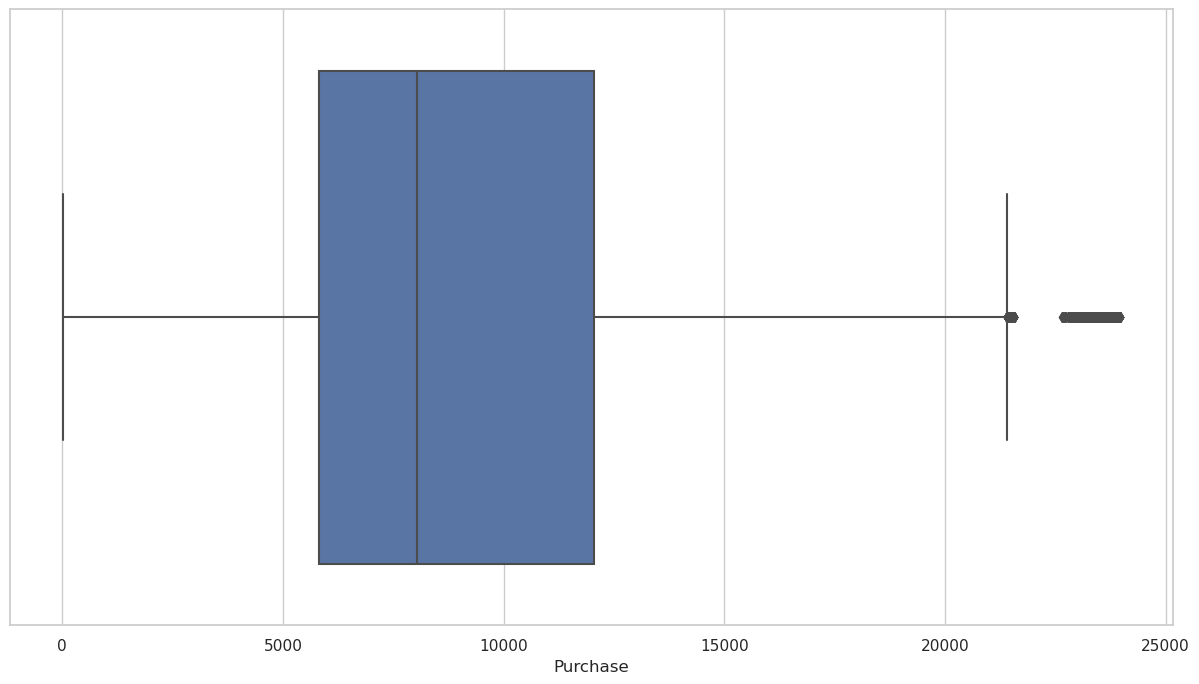

In [10]:
fig, ax = plt.subplots(figsize =(15,8))

sns.boxplot(data = sales_data,x='Purchase')

In [11]:
'''Shape of DataFrame'''
print(f'''Number of rows: {sales_data.shape[0]:,}
Number of columns: {sales_data.shape[1]:,} ''')

Number of rows: 550,068
Number of columns: 12 


In [12]:
sales_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

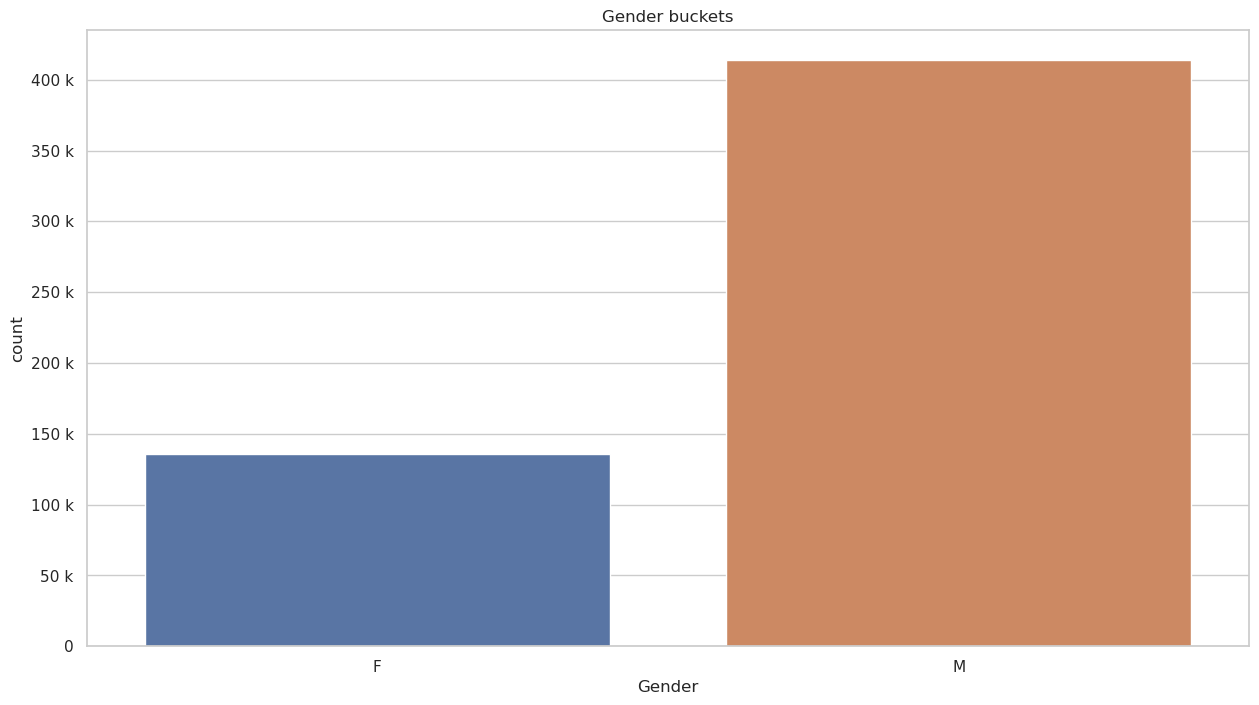

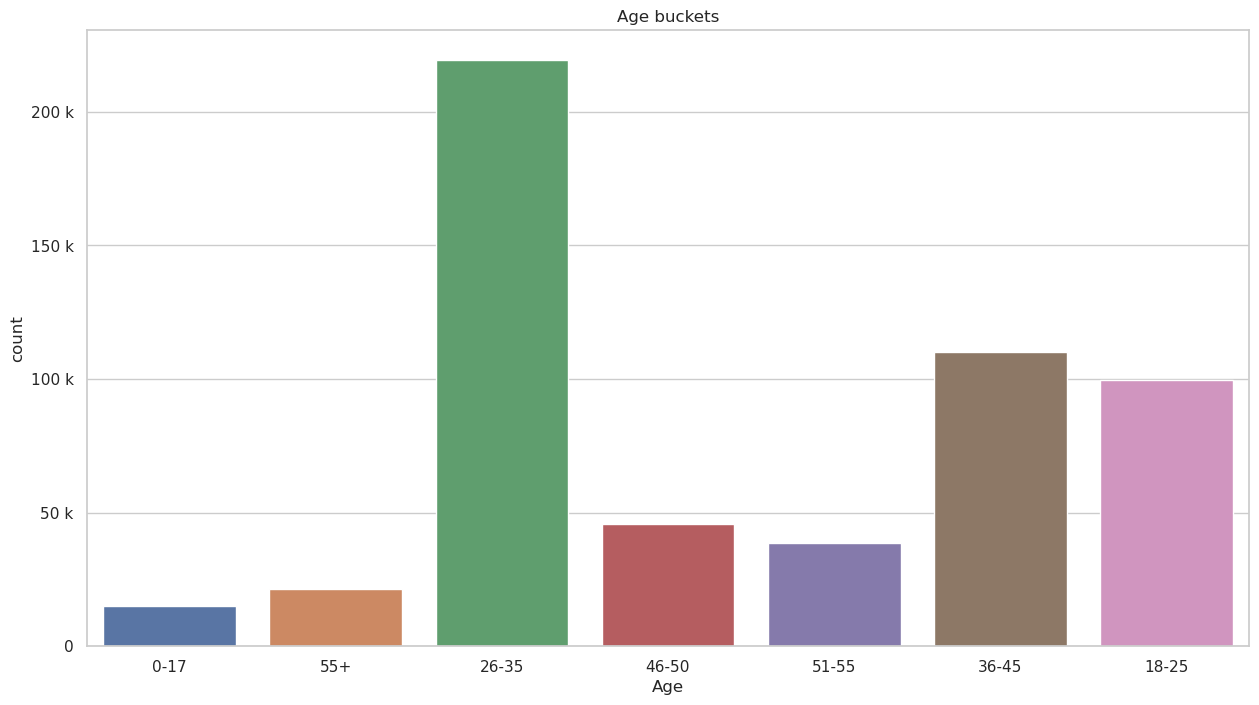

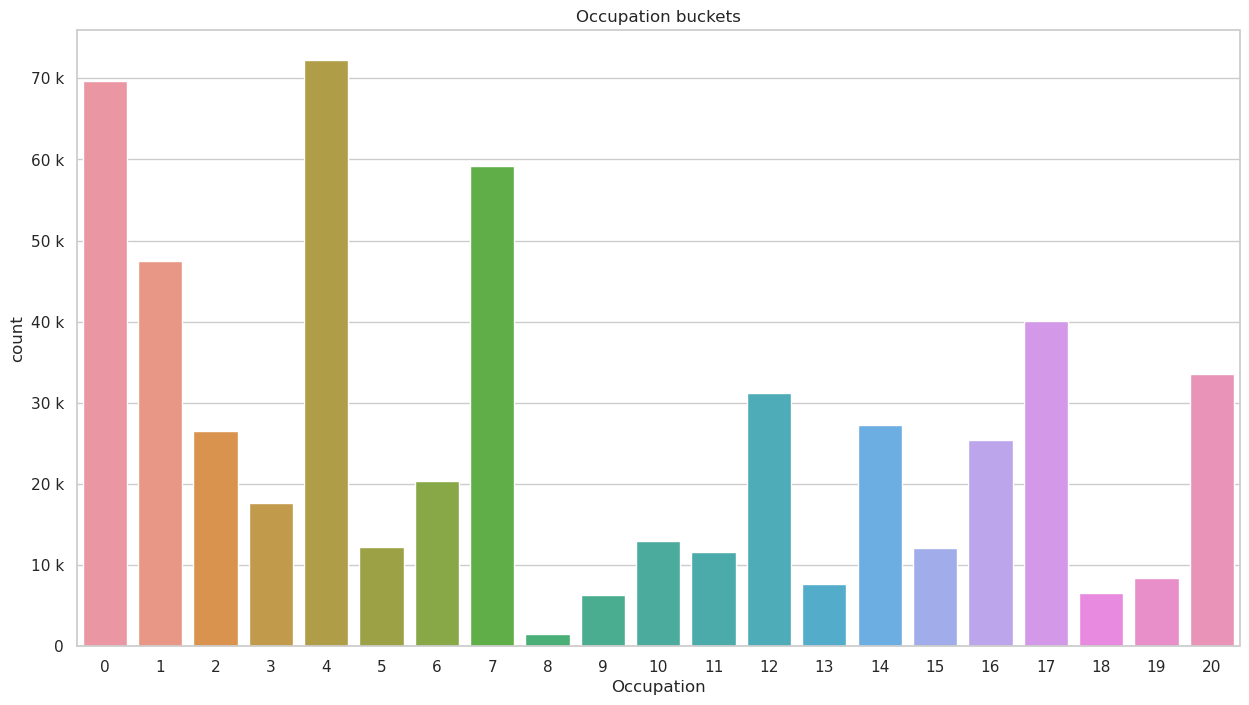

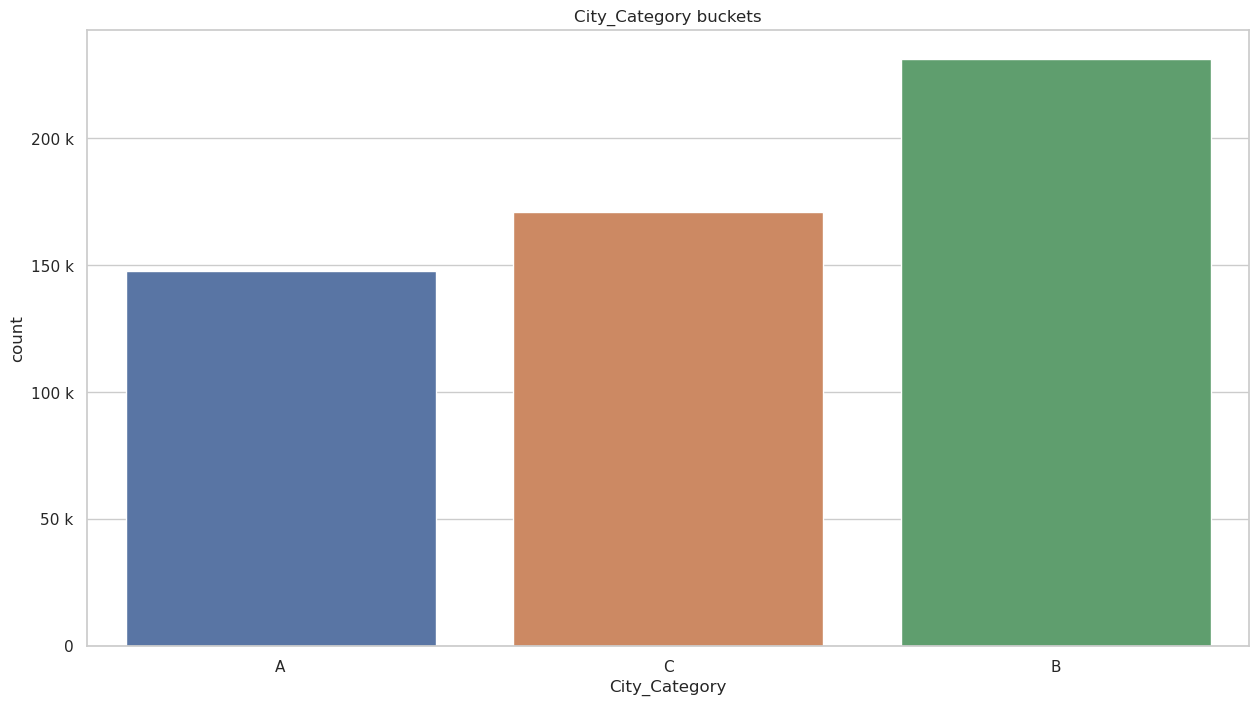

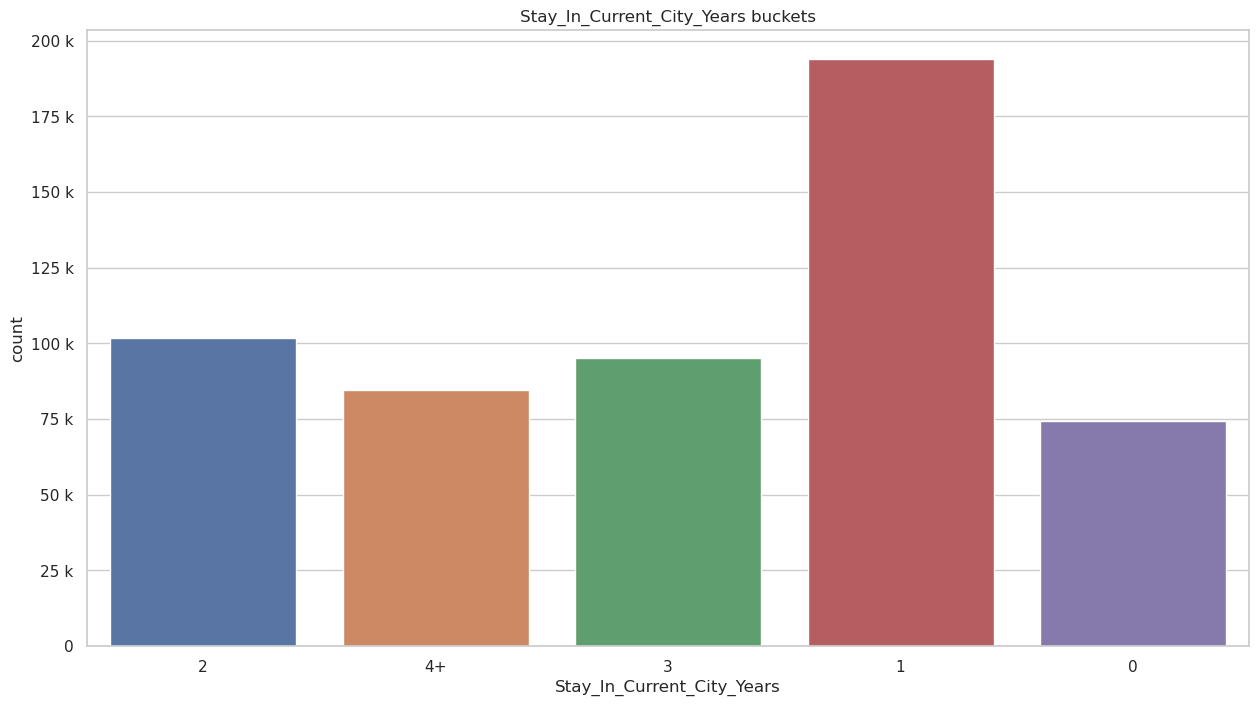

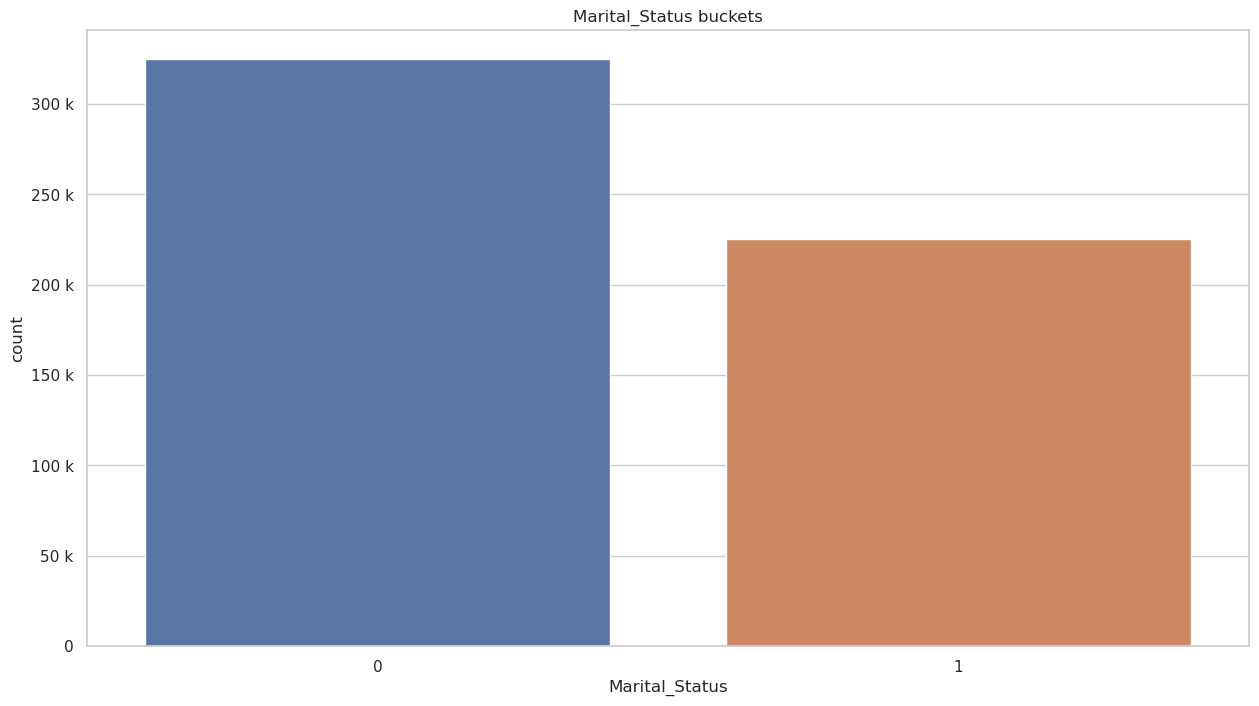

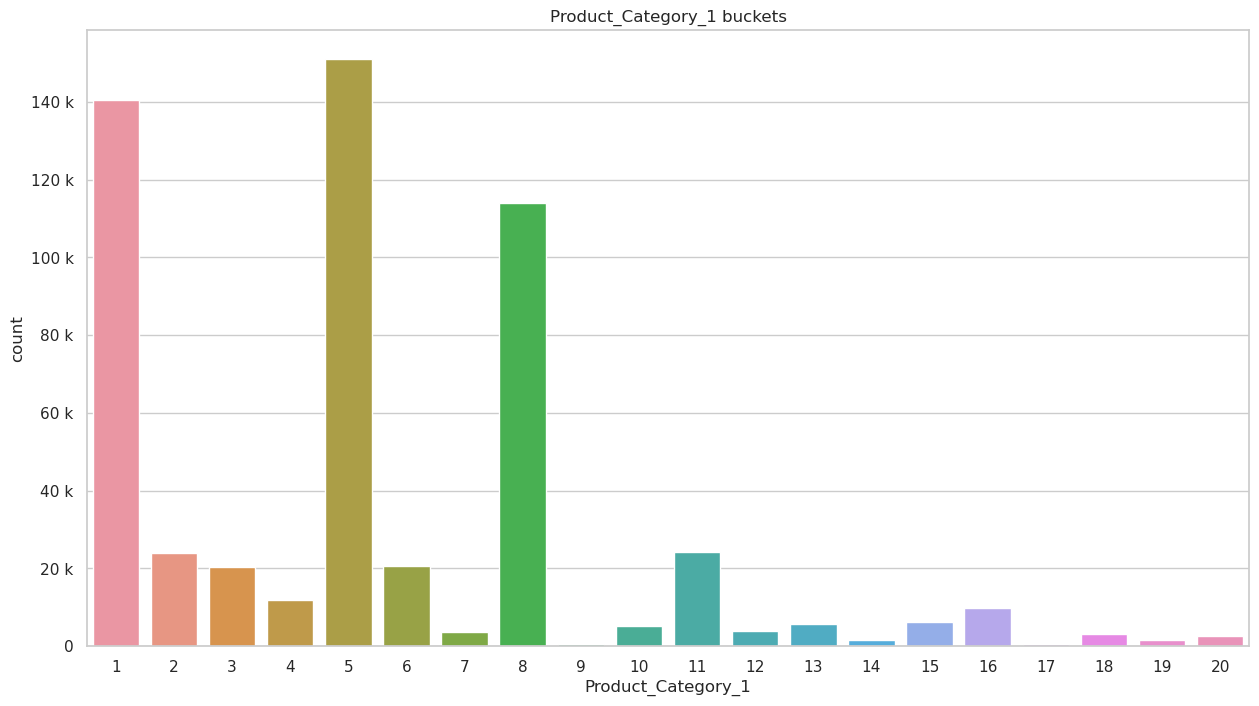

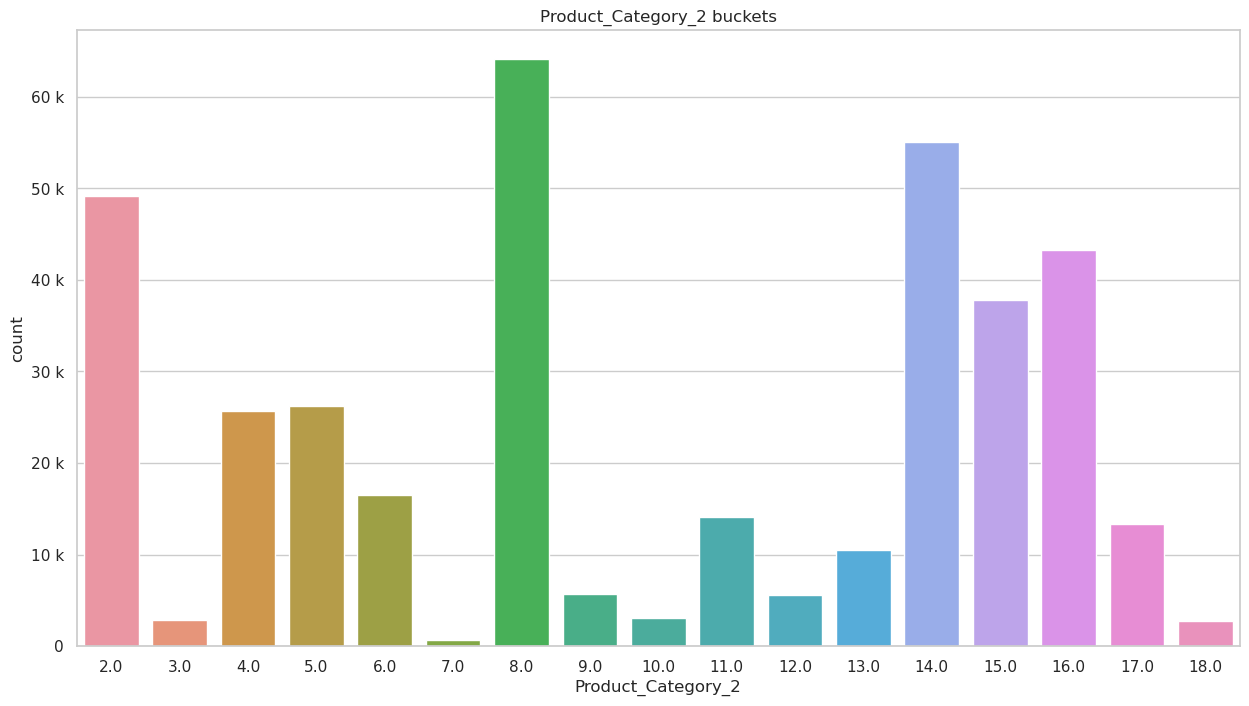

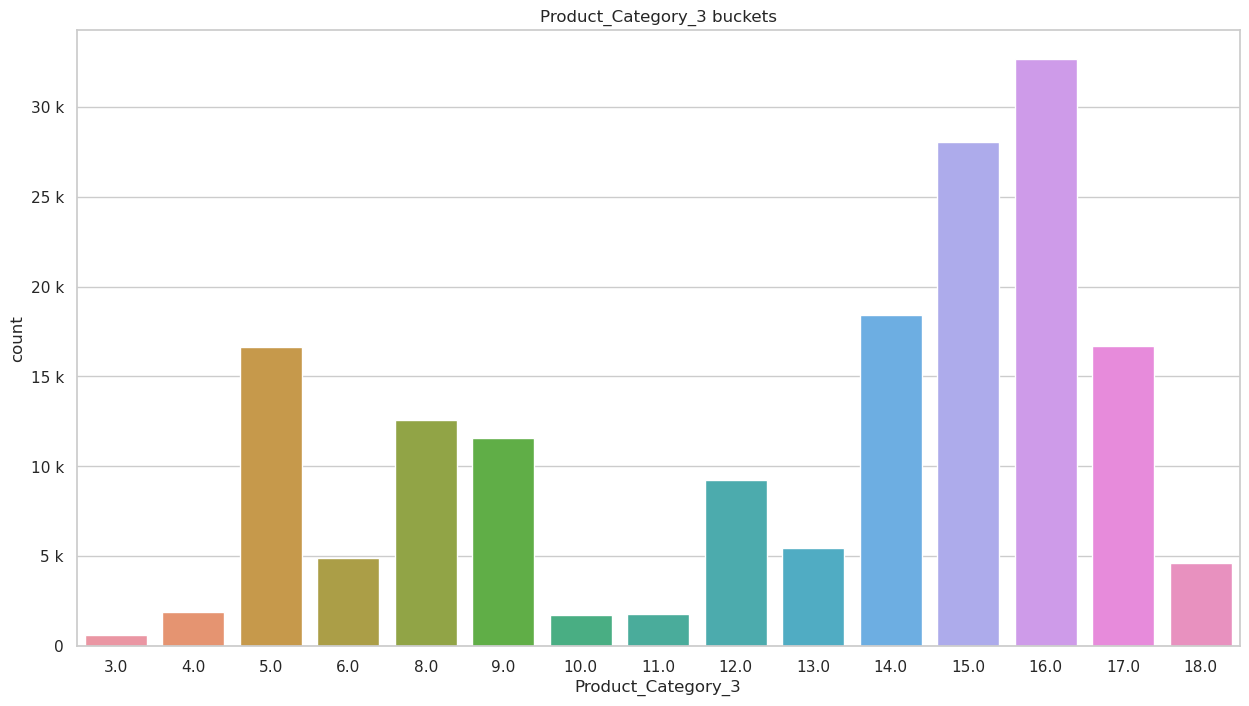

In [14]:
# Univariate analysis : Distribution of categorical data in their corresponding buckets.

for cat_col in categorical_columns:
    fig, ax = plt.subplots(figsize =(15,8))
    sns.countplot(data = sales_data, x=cat_col,ax=ax).set(title=f"{cat_col} buckets")
    ax.yaxis.set_major_formatter(fmt_obj)

<AxesSubplot:>

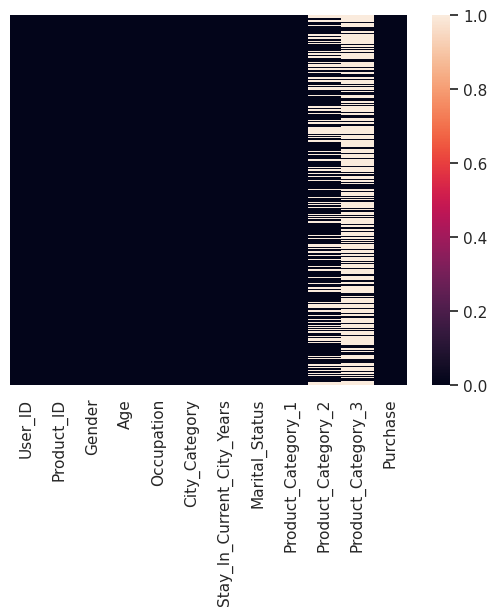

In [15]:
''' Null values in the dataset'''

sns.heatmap(sales_data.isnull(),yticklabels = False,cbar = True)

In [16]:
sales_data.isnull().sum().reset_index()

index       0
0                      User_ID       0
1                   Product_ID       0
2                       Gender       0
3                          Age       0
4                   Occupation       0
5                City_Category       0
6   Stay_In_Current_City_Years       0
7               Marital_Status       0
8           Product_Category_1       0
9           Product_Category_2  173638
10          Product_Category_3  383247
11                    Purchase       0

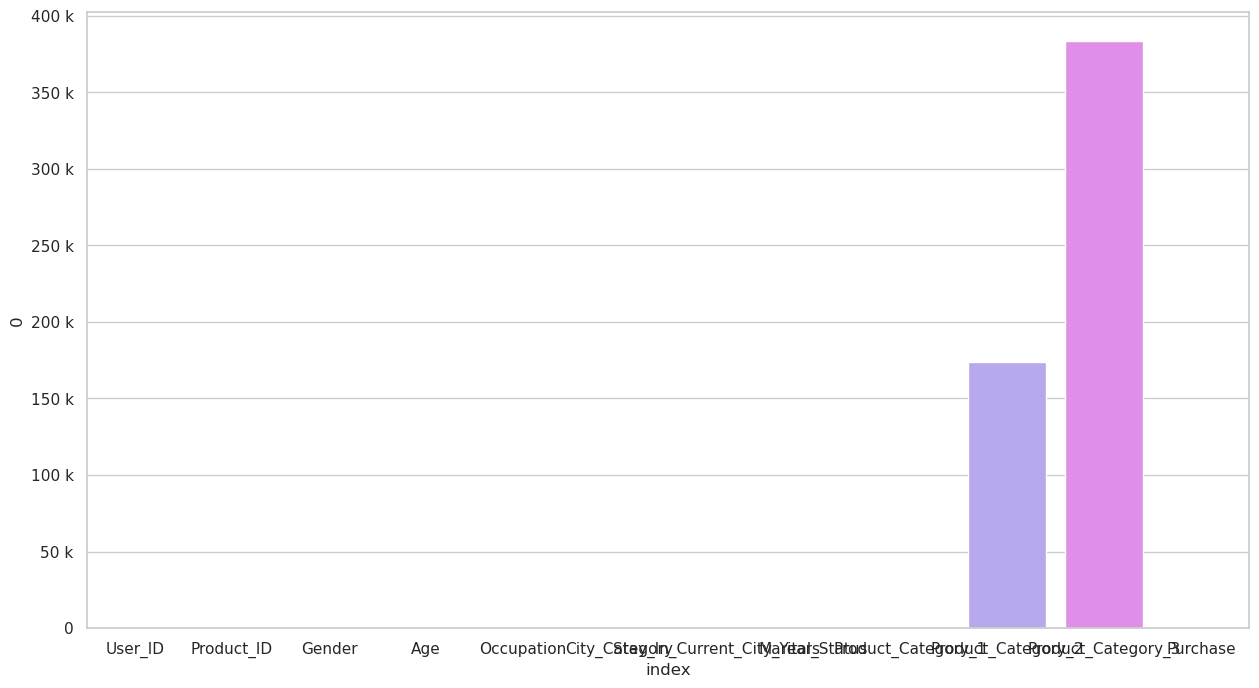

In [17]:
''' Null values in the dataset'''
fig, ax = plt.subplots(figsize =(15,8))
sns.barplot(data = sales_data.isnull().sum().reset_index(),x='index',y=0)
ax.yaxis.set_major_formatter(fmt_obj)

In [18]:
sales_data.groupby('Age').agg({'Purchase':sum}).reset_index()

Age    Purchase
0   0-17   134913183
1  18-25   913848675
2  26-35  2031770578
3  36-45  1026569884
4  46-50   420843403
5  51-55   367099644
6    55+   200767375

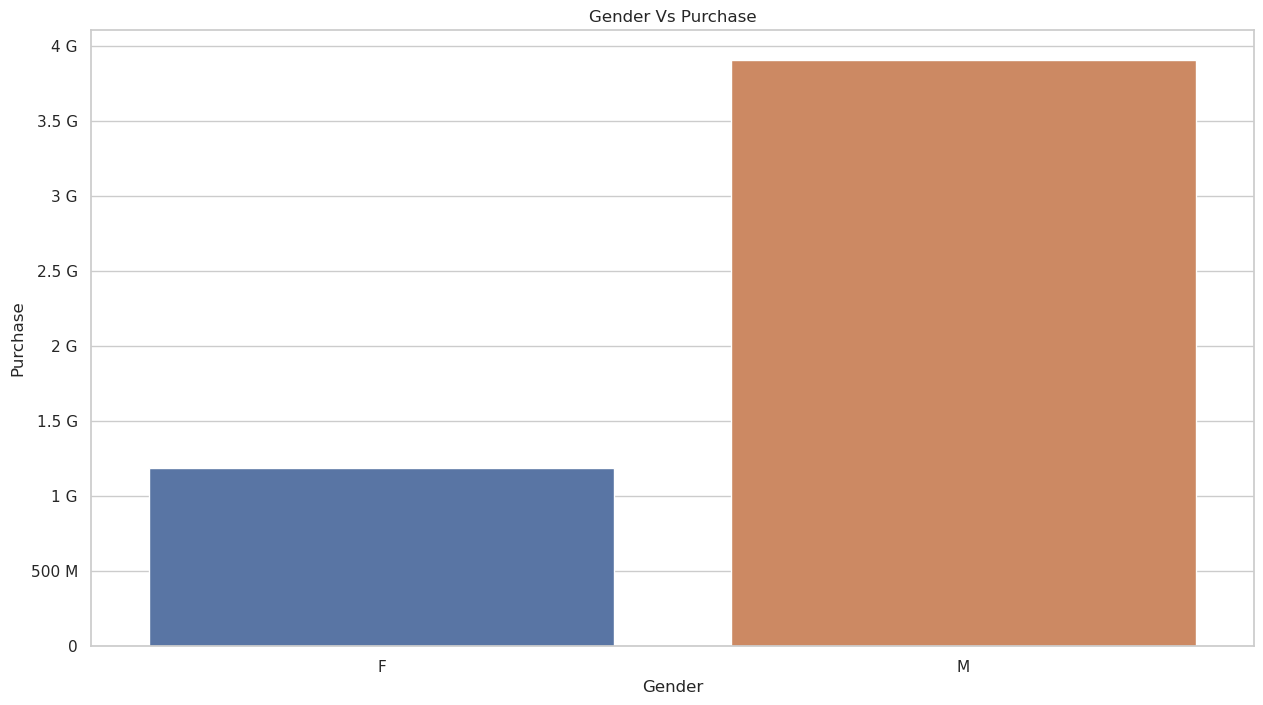

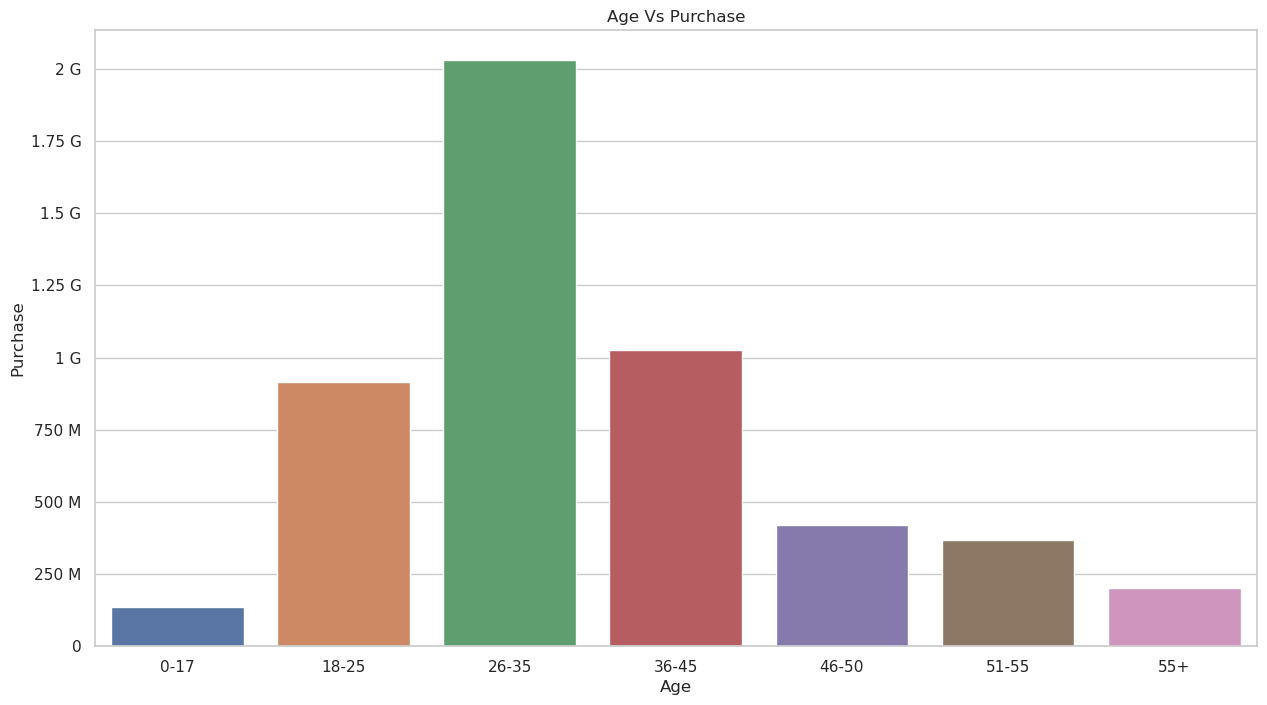

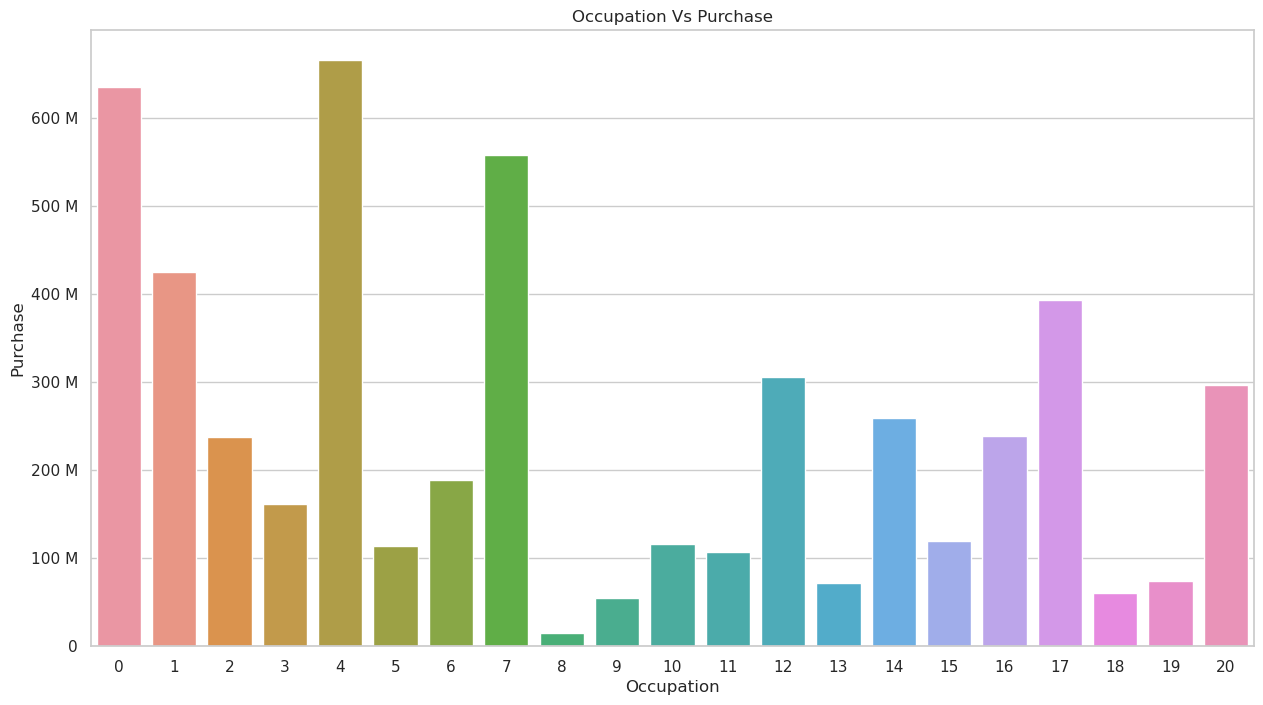

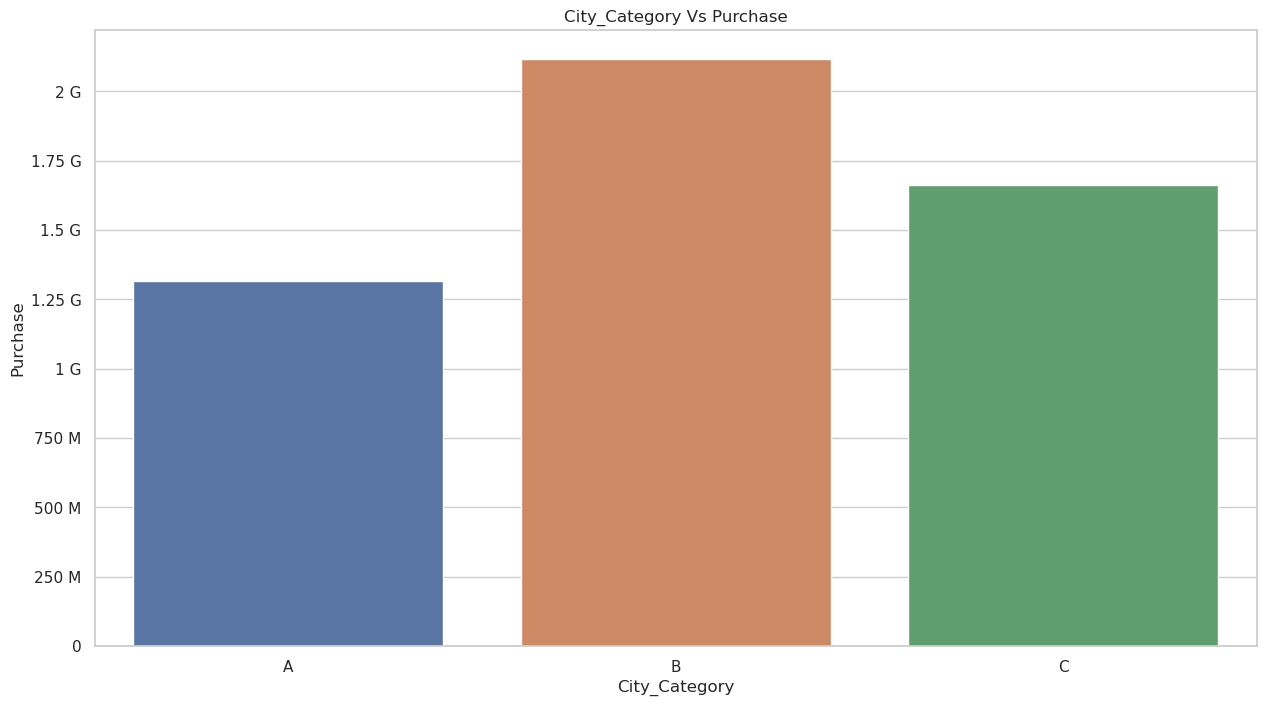

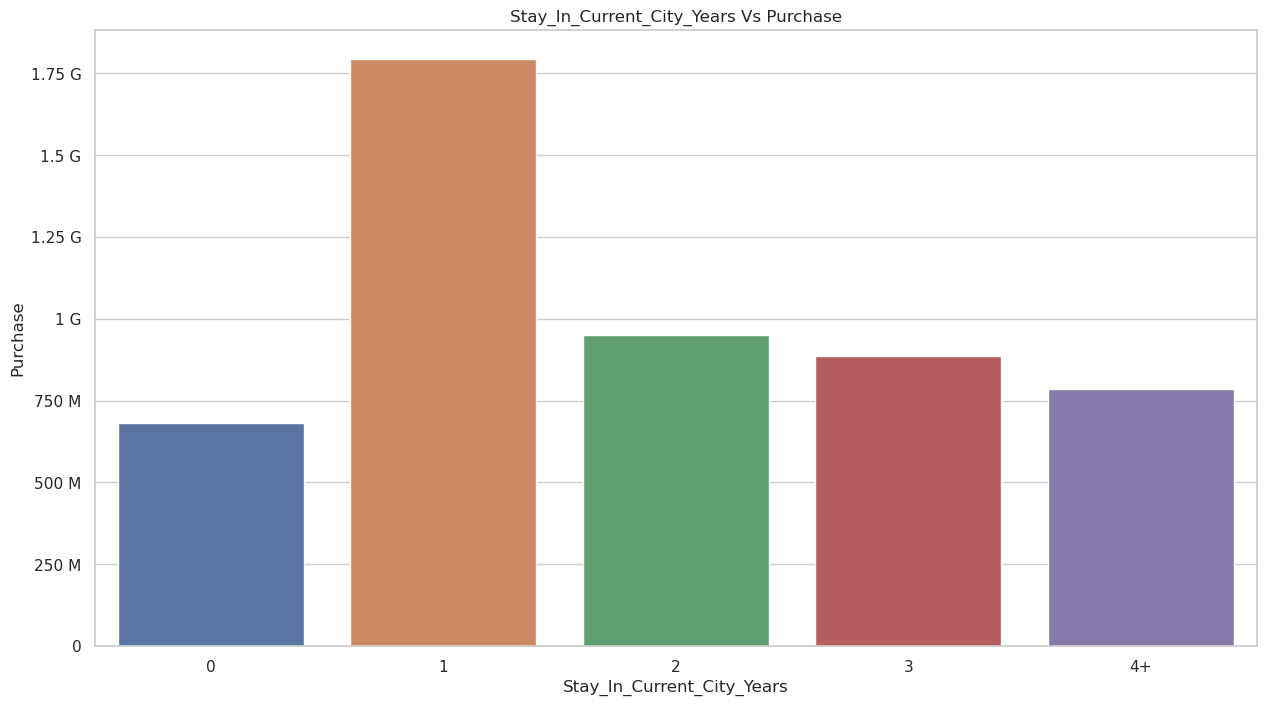

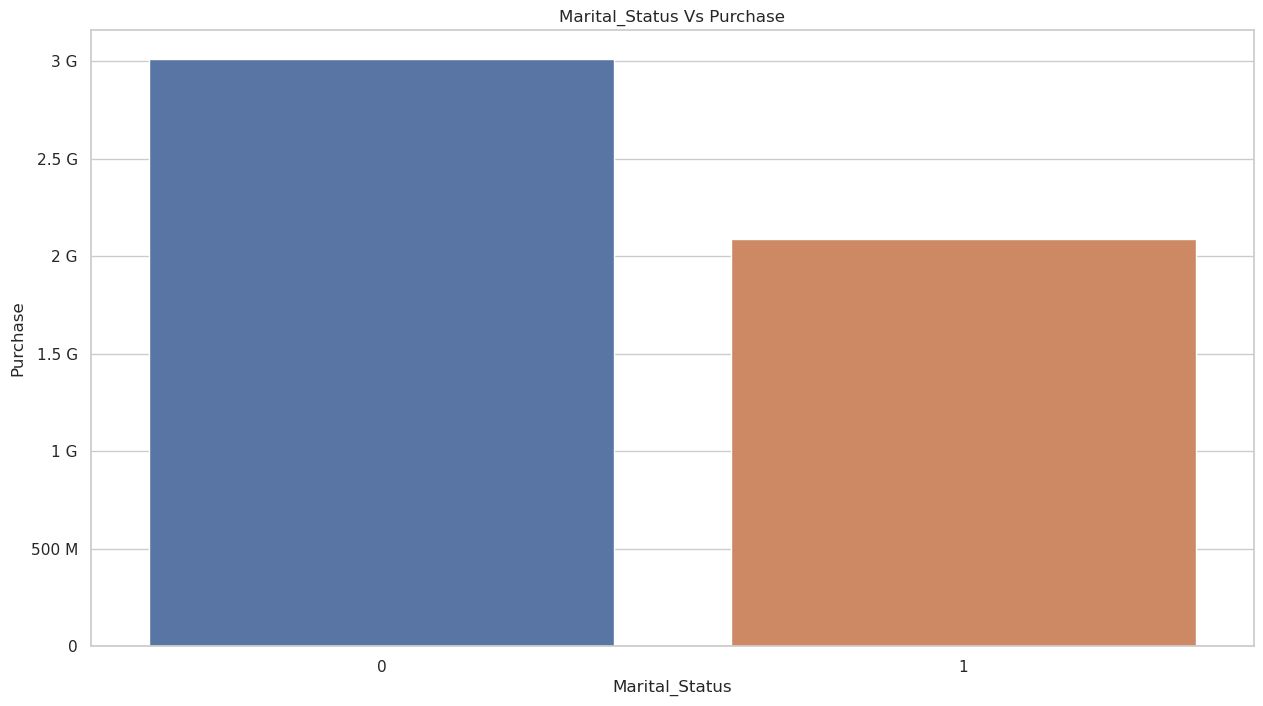

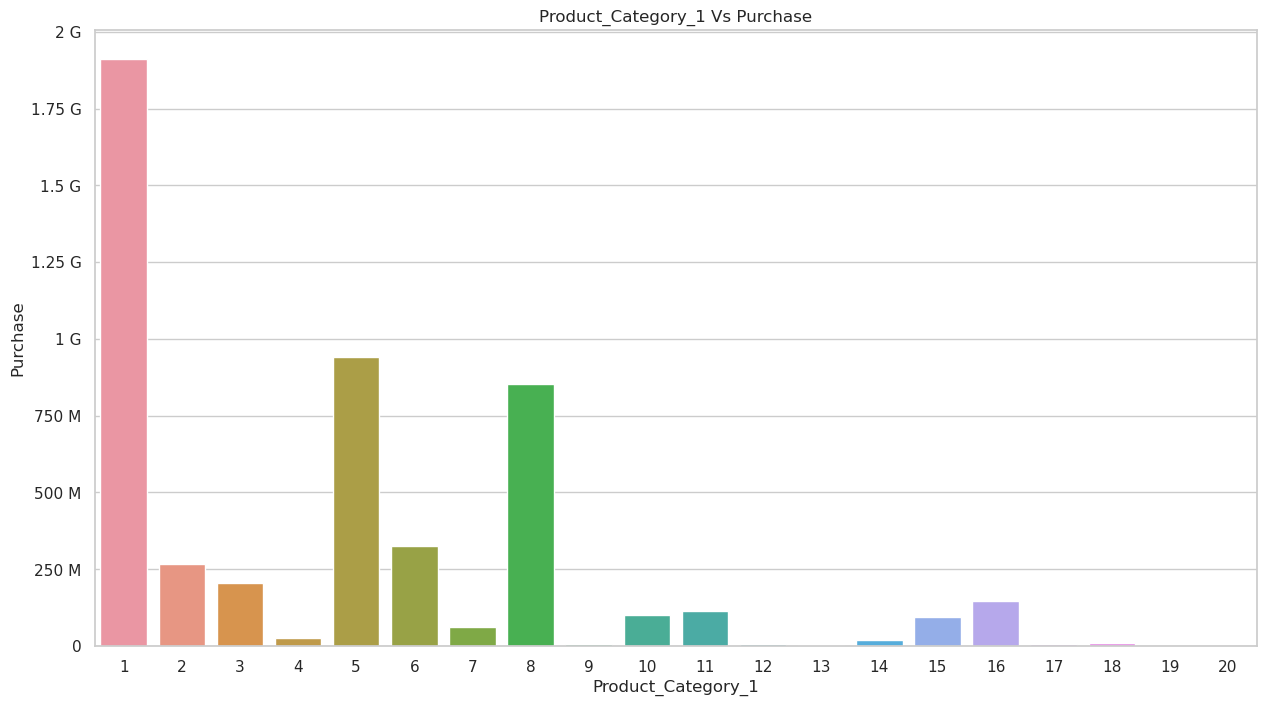

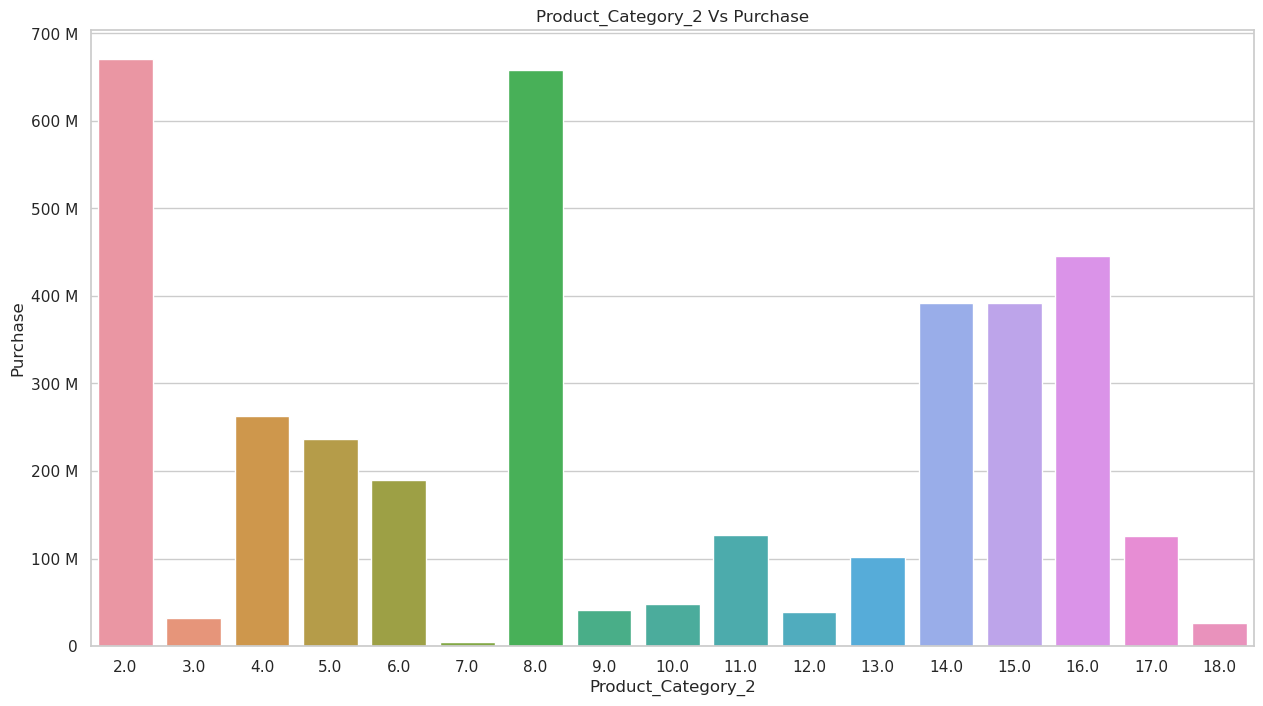

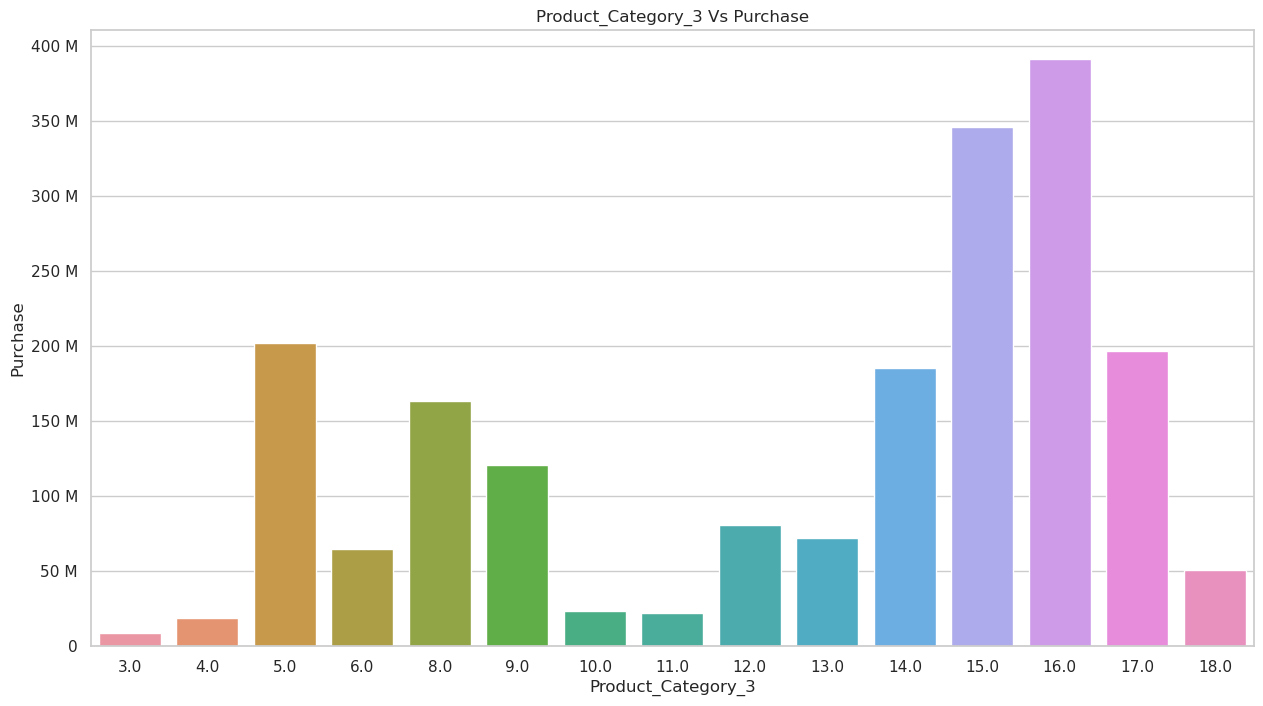

In [19]:
# Bivariate analysis
for cat_col in categorical_columns:
    fig, ax = plt.subplots(figsize =(15,8))
    temp = sales_data.groupby(cat_col).agg({'Purchase':sum}).reset_index()
    sns.barplot(data = temp, x = cat_col , y = 'Purchase', ax=ax).set(title = f"{cat_col} Vs Purchase")
    ax.yaxis.set_major_formatter(fmt_obj)

**OBSERVATIONS**

> 1. Number of different segment people visited the store is directly proportional to purchase amount
2. Ex: No:of men visited the store is greater than women hence the total purchased value is also greater than women.
3. This observation holds true for all the segments of people visited the store.

In [20]:
sales_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

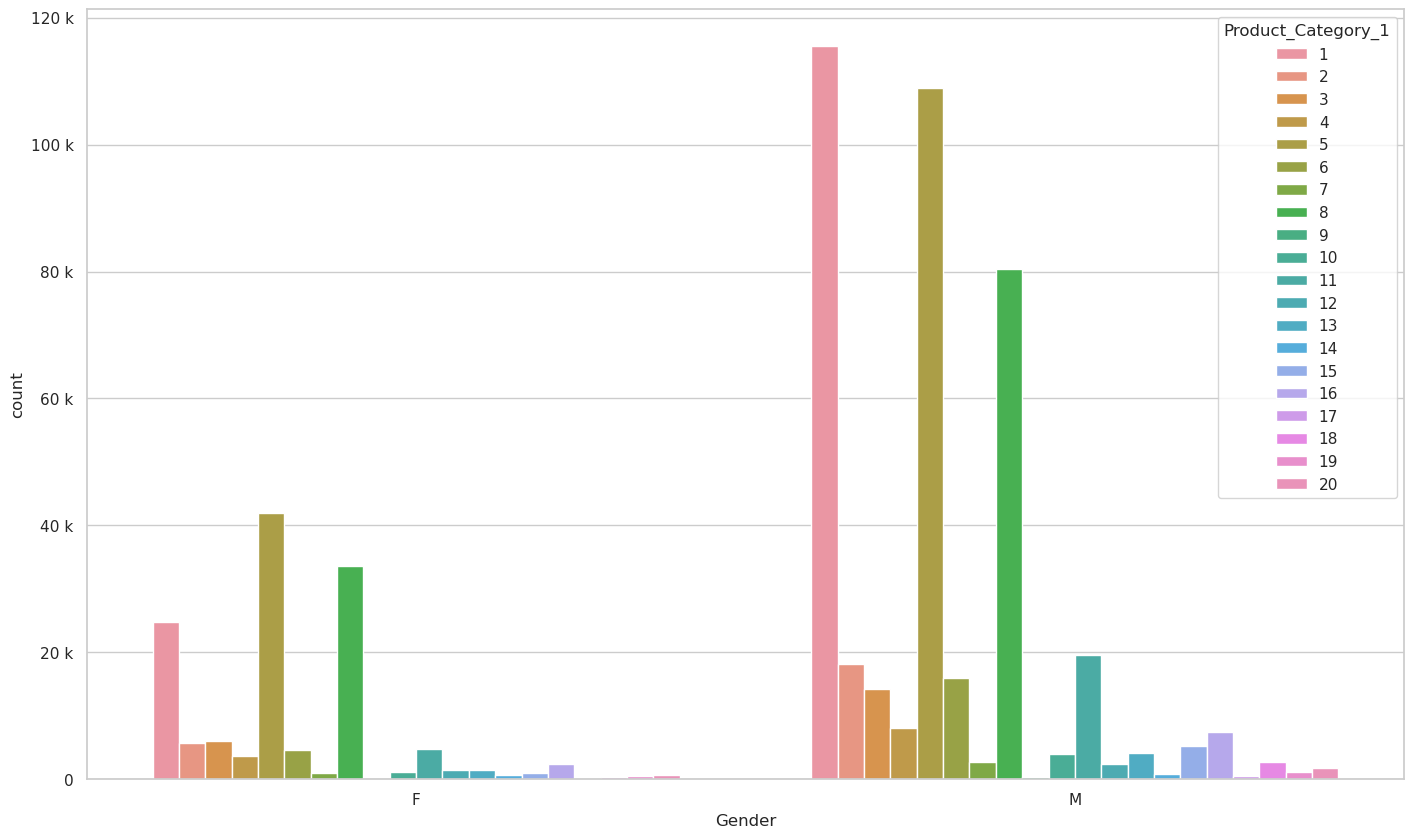

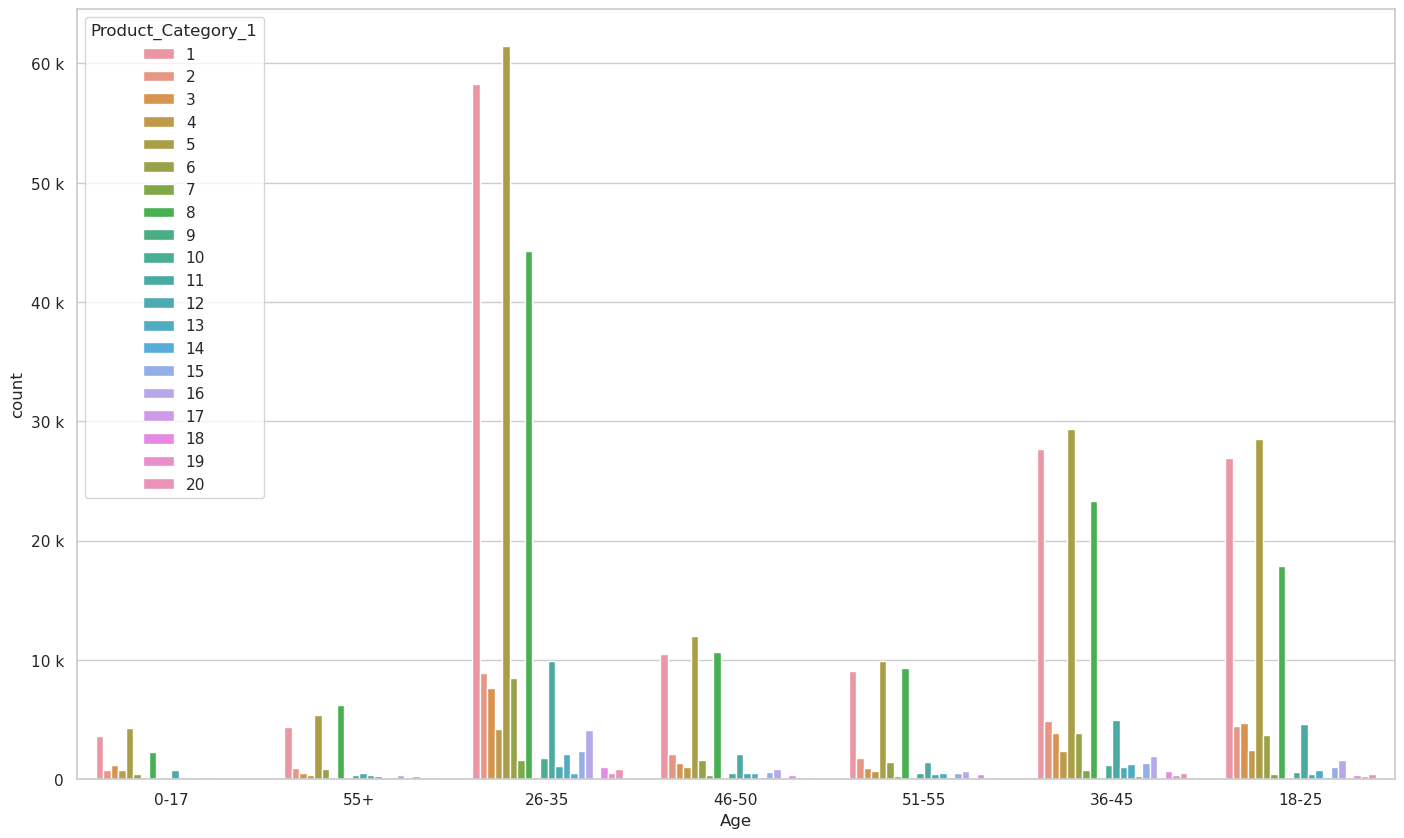

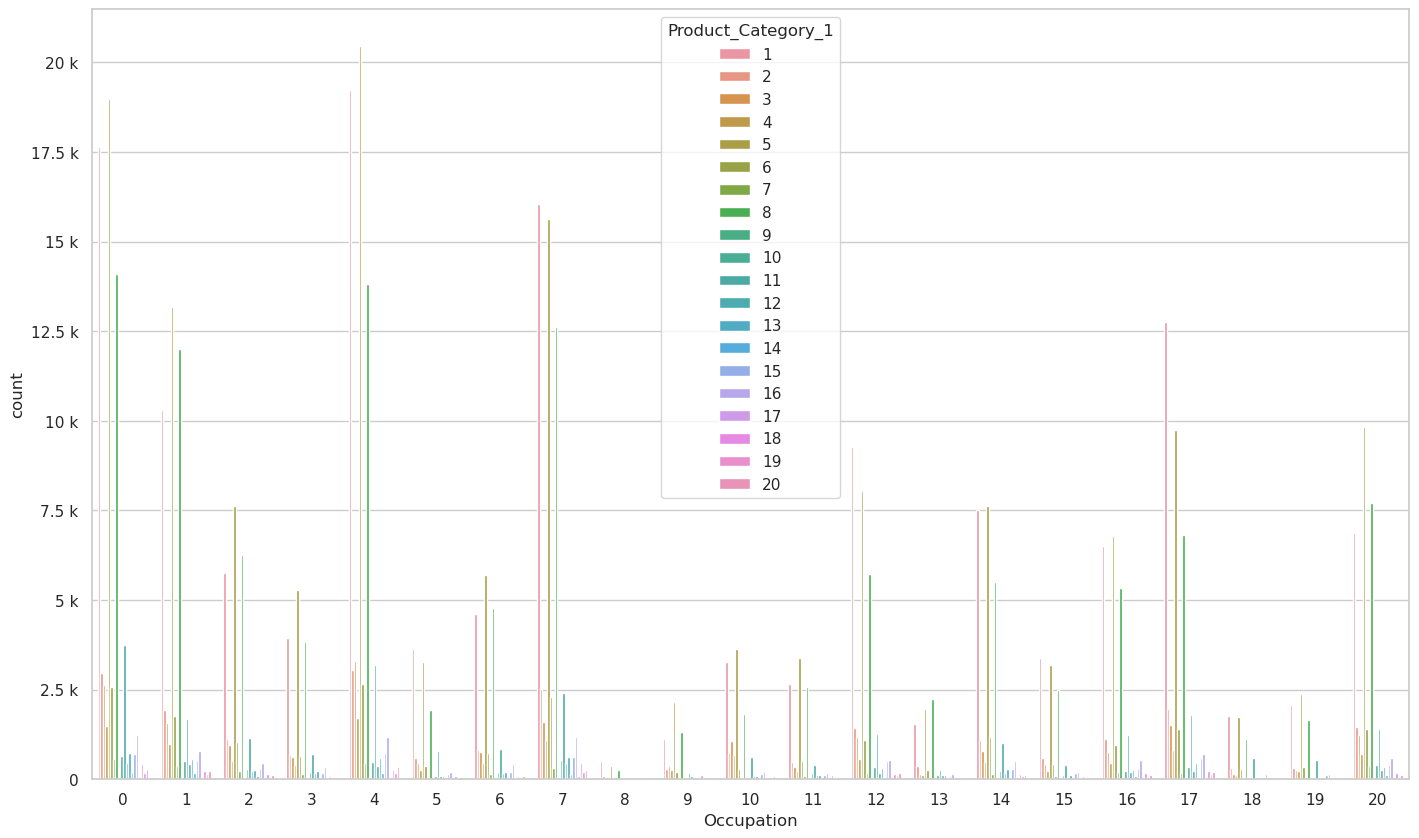

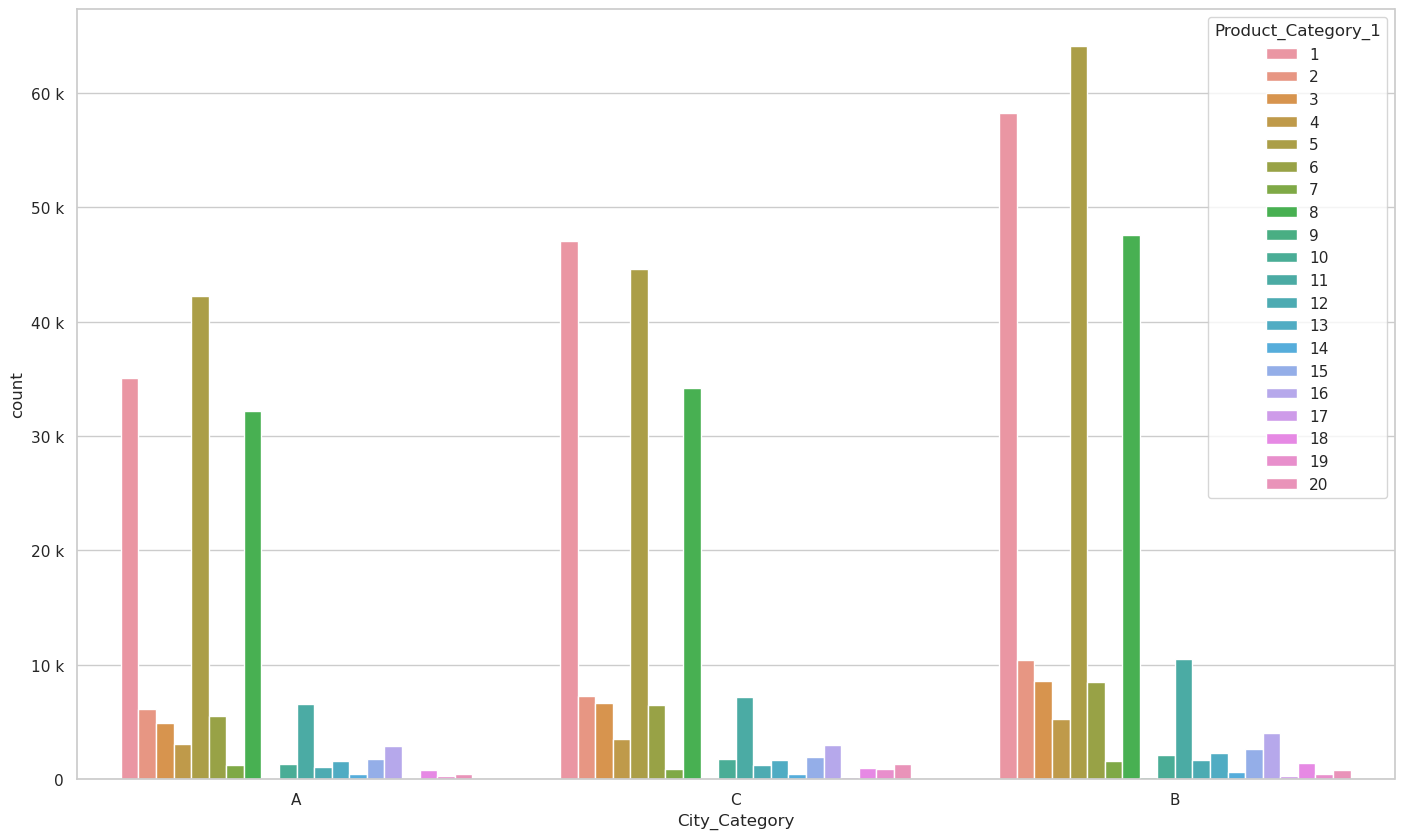

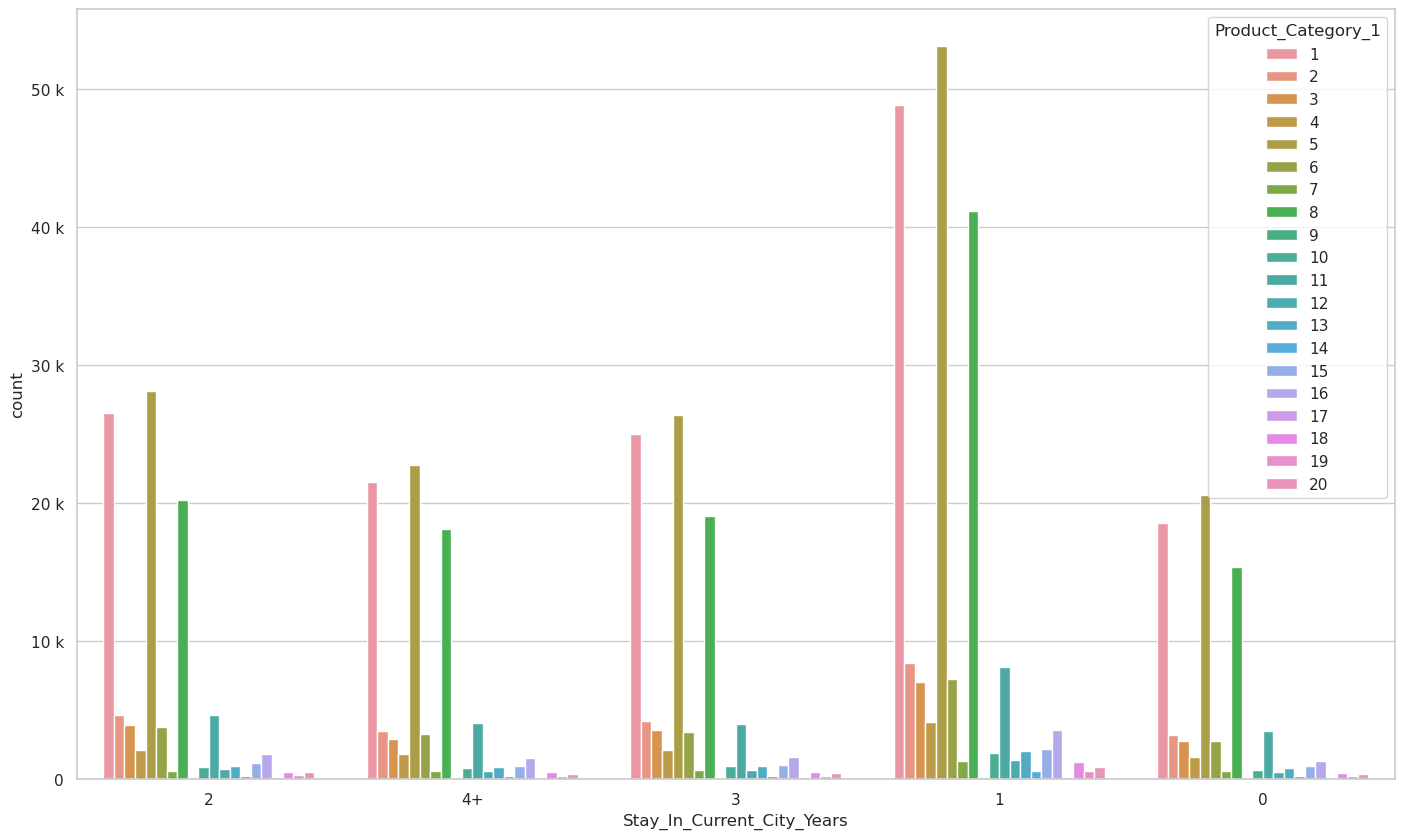

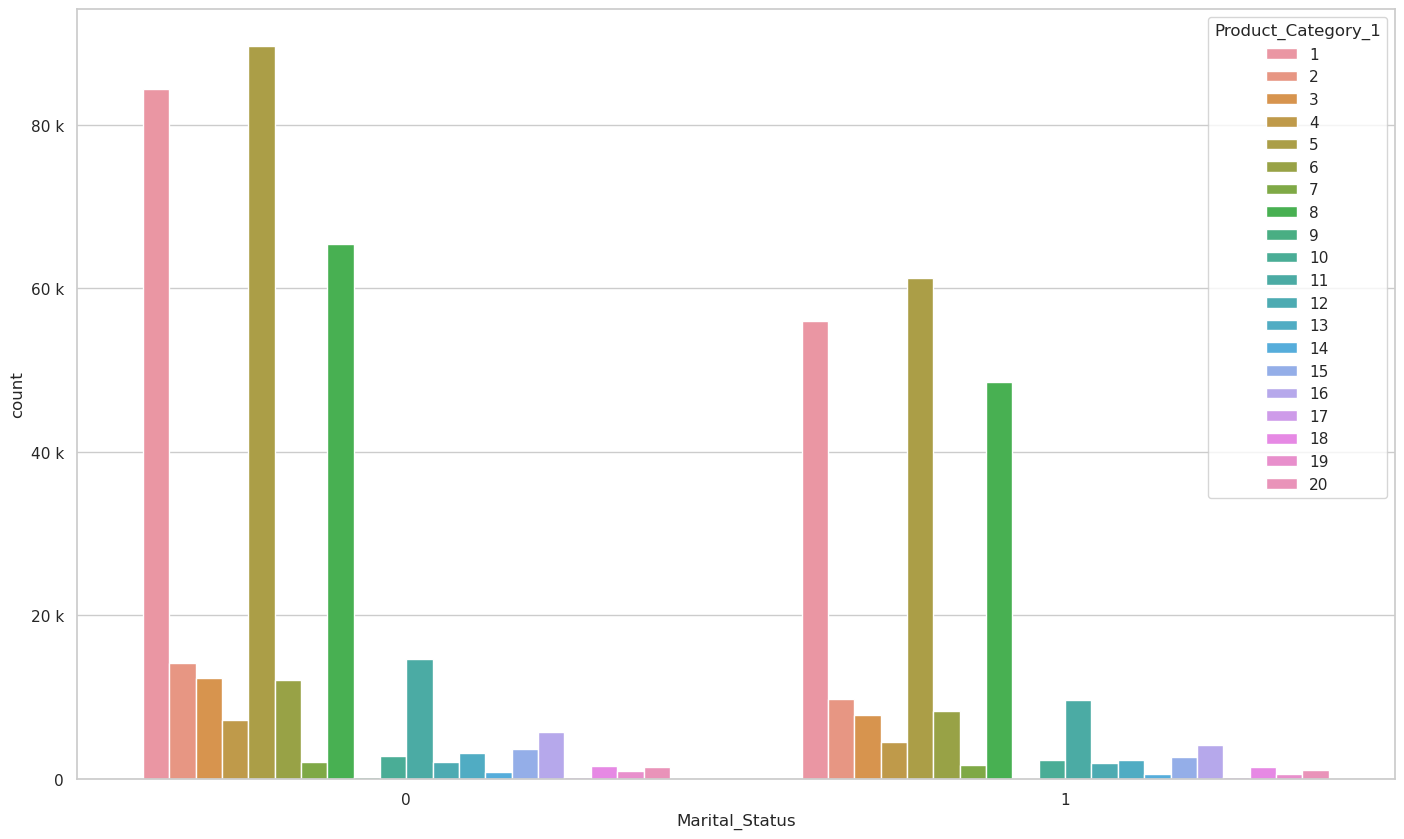

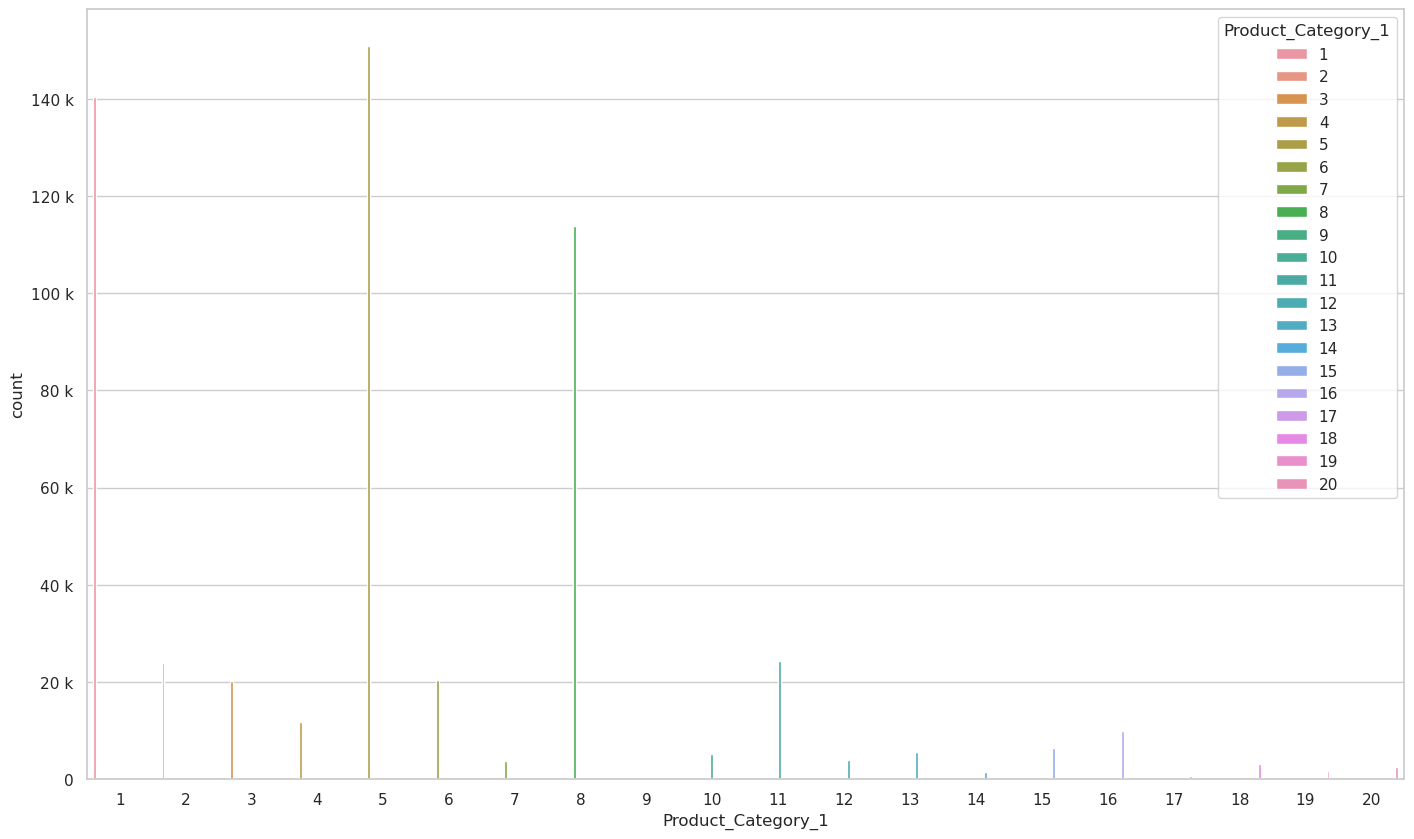

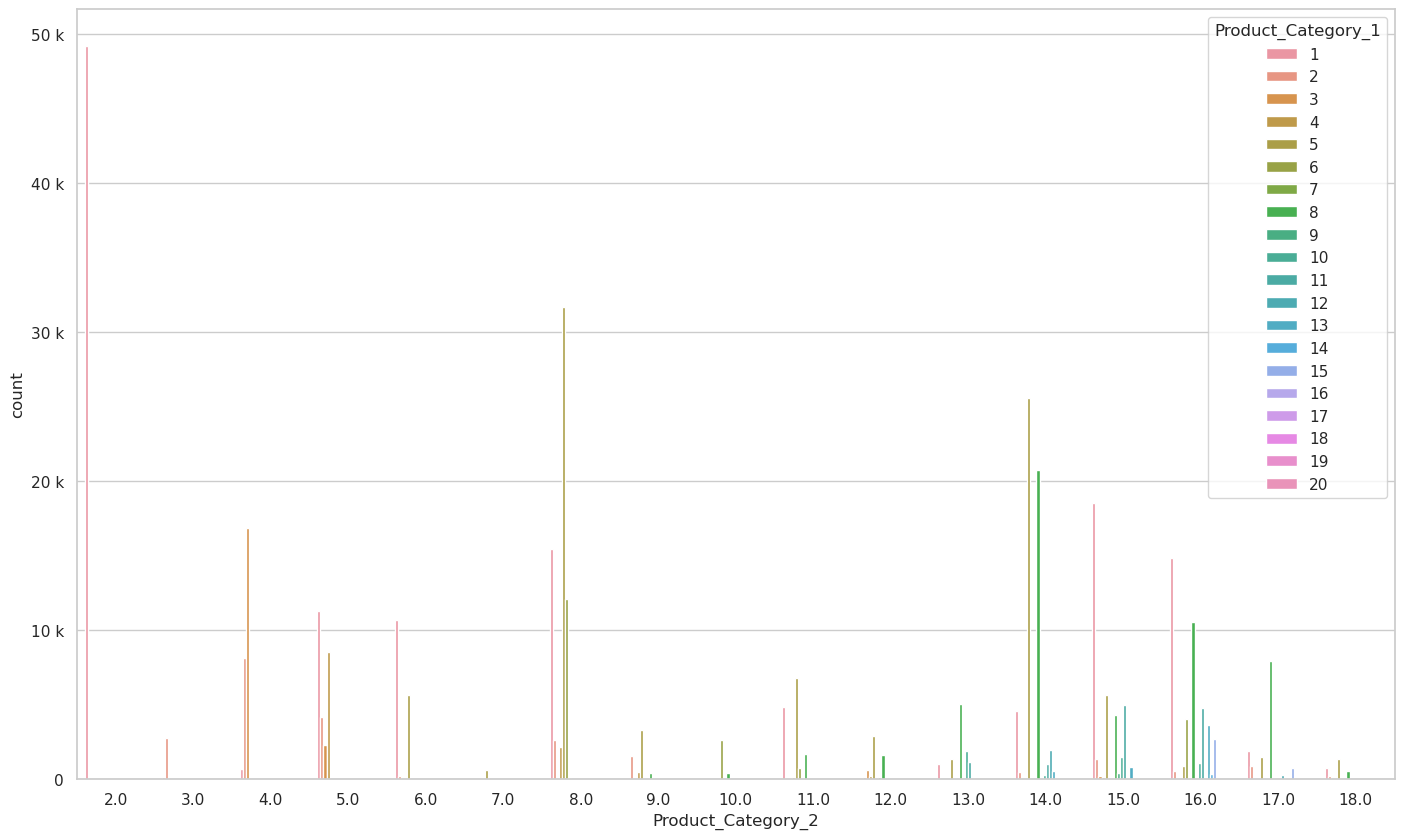

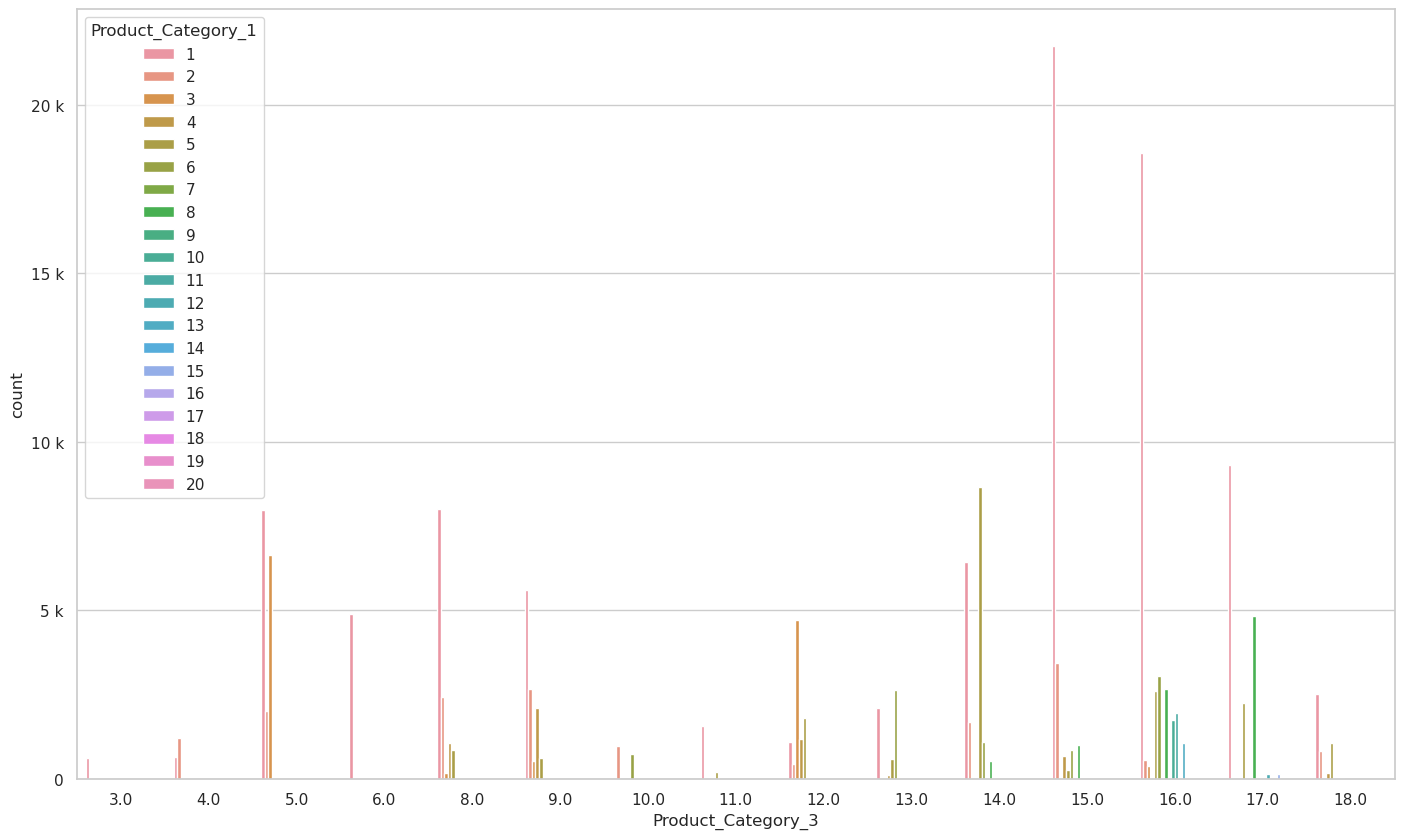

In [21]:
'''Commparision of different categorical variables with product_category purchased'''

for cat_col in categorical_columns:
    fig, ax = plt.subplots(figsize =(17,10))
    sns.countplot(data = sales_data, x= cat_col, hue='Product_Category_1')
    ax.yaxis.set_major_formatter(fmt_obj)

**OBSERVATIONS**

> 1. In all the segments the product category that was sold highest is evenly distributed .
2. This implies that the product categories that got sold are all equally scaled leading to category 1,5, and 8 as the top 3 sold in all .

## Feature Engineering

**Feature Engineering Techniques for Machine Learning**

> 1. Imputation
> > * Numerical Imputation 
> > * Categorical Imputation
2. Handling Outliers
3. Log Transform
4. Encoding
> > * label 
> > * one-hot 
5. Scaling
> > * Normalization
> > * Standardization

In [22]:
import sklearn.preprocessing as sk_preprocess

### sampling to create validation set 

In [23]:
sales_data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

In [24]:
''' Remove unwanted columns'''

sales_data.drop(columns  = ['User_ID','Product_ID'], inplace=True)

In [25]:
validation = sales_data.sample(frac=0.3,replace=False,random_state = 1)

In [26]:
x_train = sales_data.drop(validation.index, axis = 0)
x_train.reset_index(inplace=True,drop = True)
x_val = validation.reset_index(drop=True)
y_train = x_train['Purchase']
y_val = x_val['Purchase']
x_train.drop(columns = ['Purchase'],inplace=True)
x_val.drop(columns = ['Purchase'],inplace=True)

In [27]:
print(f"Shape of x_train {x_train.shape[0]:,} rows ,{x_train.shape[1]} cols")
print(f"Shape of y_train {y_train.shape[0]:,} rows")
print(f"Shape of x_val {x_val.shape[0]:,} rows,{x_val.shape[1]} cols")
print(f"Shape of y_val {y_val.shape[0]:,} rows")

Shape of x_train 385,048 rows ,9 cols
Shape of y_train 385,048 rows
Shape of x_val 165,020 rows,9 cols
Shape of y_val 165,020 rows


In [28]:
class feature_engineering:
    def __init__(self,training_data = x_train):
        self.prod_cat2_mode = x_train['Product_Category_2'].mode().item()
        self.prod_cat3_mode = x_train['Product_Category_3'].mode().item()
        self.std_scaler = sk_preprocess.StandardScaler()
    
    # ENCODING
    def do_encoding(self,df): 
        '''Encoding Gender'''
        df['Gender'] = df['Gender'].map({'F':0,'M':1})

        ''' Encoding Age'''
        df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

        '''Encoding City_Category'''
        city_cats = pd.get_dummies(df['City_Category'],drop_first = True)
        df = pd.concat([df,city_cats],axis=1)
        df.drop(columns = ['City_Category'] , inplace=True)

        '''Handling Stay_In_Current_City_Years '''
        df['Stay_In_Current_City_Years'].unique()
        df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4').astype(int)

        return df
    
    # NULL IMPUTATION
    def fillna_with_mode(self,df): 
        df['Product_Category_2'] = df['Product_Category_2'].fillna(self.prod_cat2_mode)
        df['Product_Category_3'] = df['Product_Category_3'].fillna(self.prod_cat3_mode)
        return df
    
    # FEATURE SCALING
    def scaling(self,df,train):
        cols = df.columns
        if train:
            print('Fitting train for scaling')
            self.std_scaler.fit(df)
        df = self.std_scaler.transform(df)
        df = pd.DataFrame(df,columns = cols)
        return df
    
    # MAIN_FUNCTION
    def do_all(self,df,train = False):
        df = self.do_encoding(df = df.copy())
        df = self.fillna_with_mode(df = df.copy())
        df_ = self.scaling(df,train = train)
        if train:
            return df,df_
        return df


In [29]:
def before_vs_after_scaling(df,df_scaled):
    df_scaled.columns = df.columns
    no_of_columns = df.shape[1]
    fig,ax = plt.subplots(no_of_columns,2,figsize = (30,60))
    col_list = df.columns
    for col, col_name in zip(range(no_of_columns),col_list):
        sns.histplot(data = df[col_name],kde = True, ax= ax[col,0])
        ax[col,0].set_title(f"Non scaled {col_name} distribution")
        
        sns.histplot(data = df[col_name],kde = True, ax= ax[col,1])
        ax[col,1].set_title(f"Scaled {col_name} distribution")
    

In [30]:
feat_eng = feature_engineering(training_data = x_train.copy())

In [31]:
non_scaled_x_train,x_train = feat_eng.do_all(df = x_train.copy(), train = True)
x_val = feat_eng.do_all(df = x_val.copy())

Fitting train for scaling


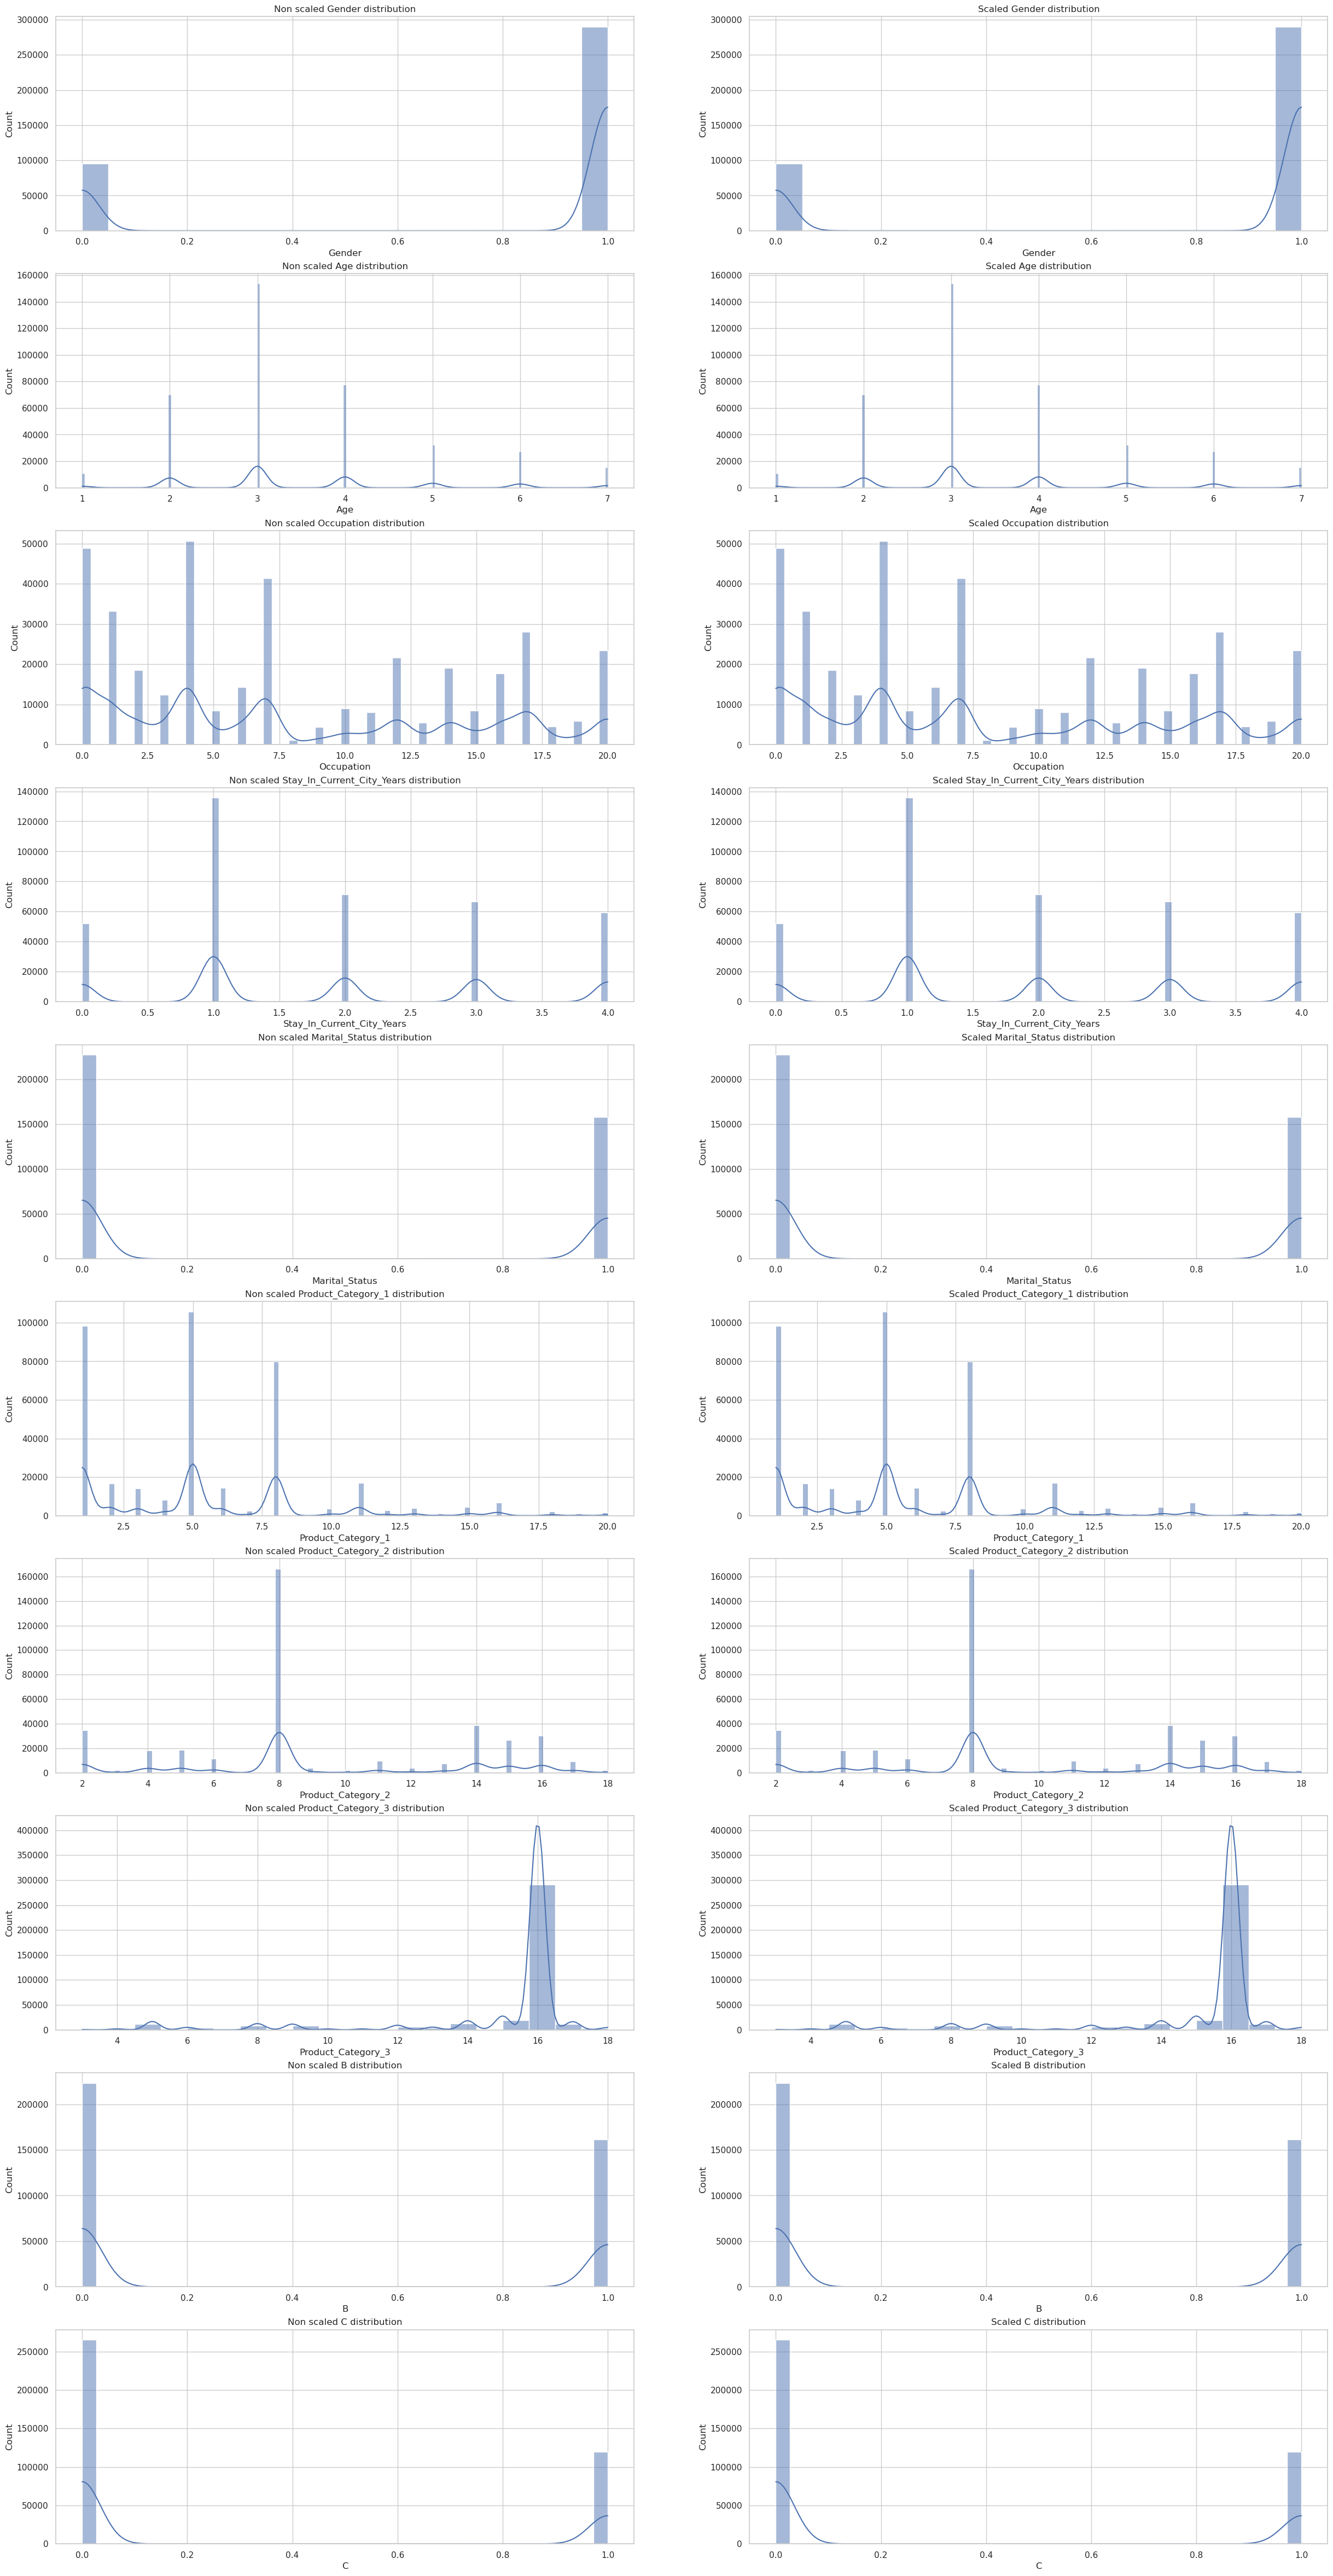

In [32]:
''' COMPARISION BETWEEN NON SCALED AND SCALED COLUMNS'''
before_vs_after_scaling(df = non_scaled_x_train, df_scaled = x_train)

In [33]:
x_train.corr()

Gender       Age  Occupation  \
Gender                      1.000000 -0.004854    0.118063   
Age                        -0.004854  1.000000    0.092017   
Occupation                  0.118063  0.092017    1.000000   
Stay_In_Current_City_Years  0.016667 -0.005659    0.030439   
Marital_Status             -0.012404  0.312244    0.023608   
Product_Category_1         -0.044707  0.060175   -0.008398   
Product_Category_2         -0.011690  0.040331    0.002212   
Product_Category_3         -0.005247  0.035623   -0.001603   
B                          -0.006140 -0.018640   -0.010927   
C                          -0.000683  0.111330    0.034972   

                            Stay_In_Current_City_Years  Marital_Status  \
Gender                                        0.016667       -0.012404   
Age                                          -0.005659        0.312244   
Occupation                                    0.030439        0.023608   
Stay_In_Current_City_Years                    1.000000       -0.013376   
Marital_Status                               -0.013376        1.000000   
Product_Category_1                           -0.004868        0.019219   
Product_Category_2                           -0.000913        0.009758   
Product_Category_3                           -0.000025        0.013907   
B                                             0.010978       -0.001545   
C                                             0.010901        0.033075   

                            Product_Category_1  Product_Category_2  \
Gender                               -0.044707           -0.011690   
Age                                   0.060175            0.040331   
Occupation                           -0.008398            0.002212   
Stay_In_Current_City_Years           -0.004868           -0.000913   
Marital_Status                        0.019219            0.009758   
Product_Category_1                    1.000000            0.279401   
Product_Category_2                    0.279401            1.000000   
Product_Category_3                    0.319406            0.464290   
B                                    -0.006547           -0.002900   
C                                    -0.008723           -0.001527   

                            Product_Category_3         B         C  
Gender                               -0.005247 -0.006140 -0.000683  
Age                                   0.035623 -0.018640  0.111330  
Occupation                           -0.001603 -0.010927  0.034972  
Stay_In_Current_City_Years           -0.000025  0.010978  0.010901  
Marital_Status                        0.013907 -0.001545  0.033075  
Product_Category_1                    0.319406 -0.006547 -0.008723  
Product_Category_2                    0.464290 -0.002900 -0.001527  
Product_Category_3                    1.000000  0.003879 -0.021529  
B                                     0.003879  1.000000 -0.572154  
C                                    -0.021529 -0.572154  1.000000

In [34]:
correlation_matrix = pd.concat([x_train,y_train],axis=1).corr()

#### Heatmap to get an overview of features correlating

<AxesSubplot:>

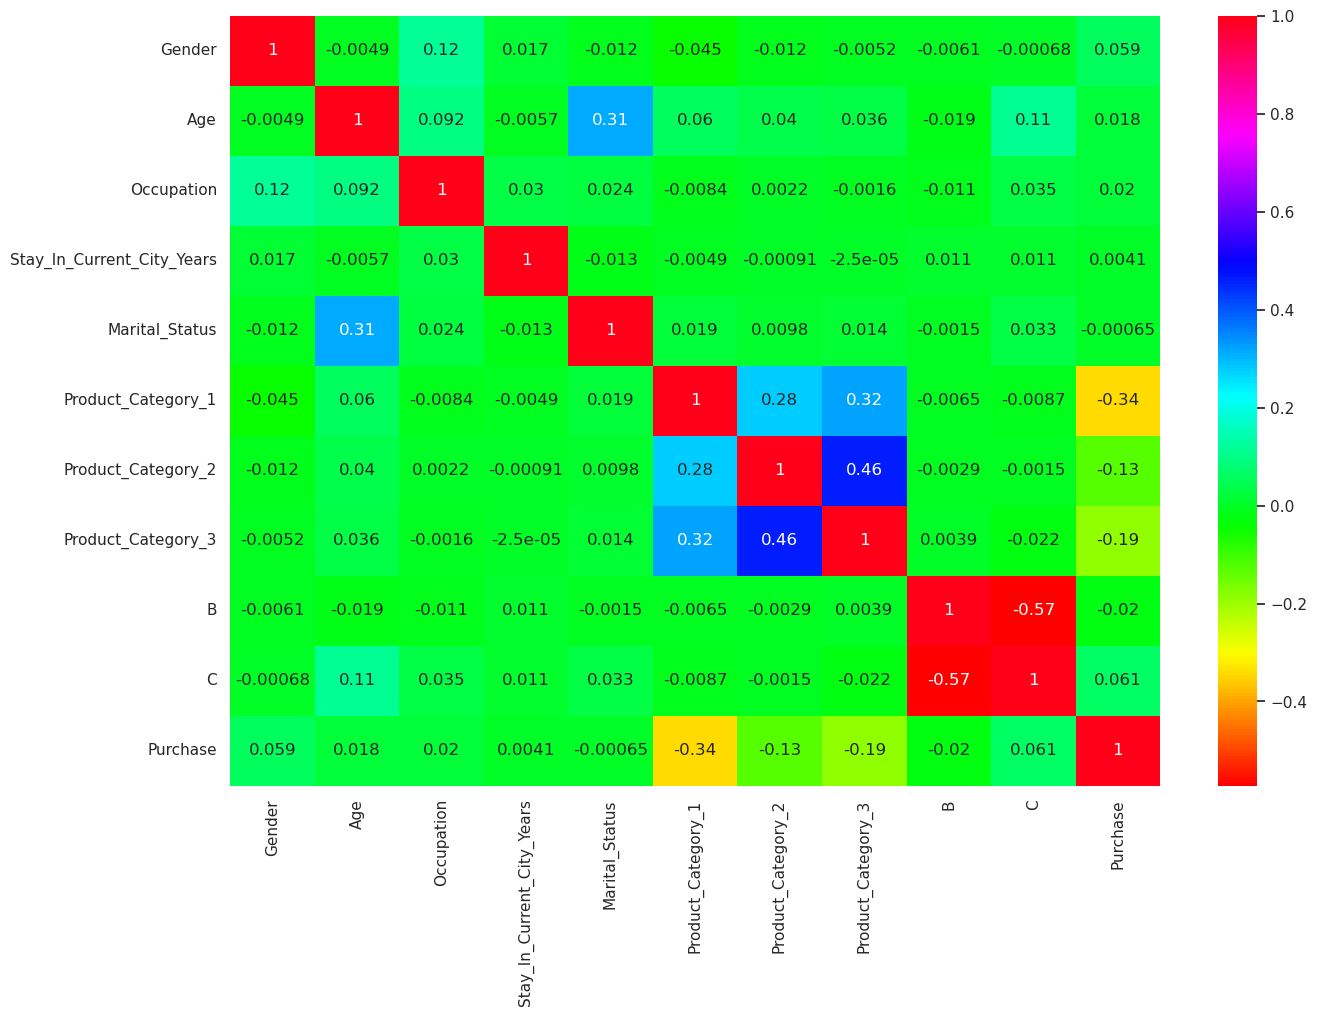

In [35]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data = correlation_matrix,annot = True,cmap='hsv')

### Modelling:


1. LR 
2. LR - ridge
3. descision tree regression
4. Random forest regression
5. Knn regression
6. Ada boost reg
7. gradient boost reg
8. Xgb reg
9. light bgm reg

#### Class Modelling will give outputs of all regression algorithms [excluding hyperparameter tuning] along with evaluation metrics [r2score and mean_squared_error]

**Note**: Predictions are made with default hyperparameters

In [36]:
class modelling:
    def __init__(self):
        from sklearn.linear_model import LinearRegression, Ridge
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor
        from xgboost import XGBRegressor
        from lightgbm import LGBMRegressor
        
        self.all_regression_models = {'linear_reg':LinearRegression(),'ridge_reg':Ridge(),'decision_tree':DecisionTreeRegressor(),'random_forest':RandomForestRegressor(),'knn':KNeighborsRegressor(),
                        'adaboost':AdaBoostRegressor(),'gbm':GradientBoostingRegressor(),'xgbm':XGBRegressor(),'lightgbm':LGBMRegressor()}
        self.all_predictions = dict()
        

    def model_fit(self,x_train,y_train):
        for model,model_obj in self.all_regression_models.items():
            model_obj.fit(x_train,y_train)
            print(f'{model} fit complete')
            
    def model_predict(self, x_test):
        for model,model_obj in self.all_regression_models.items():
            train_pred = model_obj.predict(x_test)
            self.all_predictions[model] = train_pred
            print(f'{model} prediction complete')
            
    def eval_metric(self,y_actuals):
        from sklearn.metrics import mean_squared_error,r2_score
        combined_metrics = []
        for model,model_preds in self.all_predictions.items():
            r2score = r2_score(y_actuals,model_preds)
            mse = mean_squared_error(y_actuals,model_preds)
            combined_metrics.append([model,r2score,mse])
            print(f"Model {model}")
            print(f'Regular R2 score on train data is : {r2score:%}')
            print(f'Regular mean_squared_error on train data is : {mse:,}')
            print("*********************************************************")
        df = pd.DataFrame(combined_metrics, columns = ['MODEL','R2_SCORE','MSE']).sort_values('R2_SCORE',ascending = False,ignore_index = True)
        df['MSE'] = df['MSE'].round()
        df['R2_SCORE'] = df['R2_SCORE'].round(3)
        df_styled = df.style.format({'R2_SCORE':"{:%}","MSE":"{:,}"}).background_gradient()
        return df,df_styled


In [37]:
''' CREATING PREDICTIONS ON THE SCALED TRAINING DATA ITSELF AFTER FITTING THE SAME'''

mod_first_cut = modelling()
print("------------------------")
mod_first_cut.model_fit(x_train = x_train.copy(), y_train = y_train.copy())
print("------------------------")
mod_first_cut.model_predict(x_test = x_train.copy())
print("------------------------")
scaled_train_scores,scaled_train_scores_styled=mod_first_cut.eval_metric(y_actuals = y_train.copy())

------------------------
linear_reg fit complete
ridge_reg fit complete
decision_tree fit complete
random_forest fit complete
knn fit complete
adaboost fit complete
gbm fit complete
xgbm fit complete
lightgbm fit complete
------------------------
linear_reg prediction complete
ridge_reg prediction complete
decision_tree prediction complete
random_forest prediction complete
knn prediction complete
adaboost prediction complete
gbm prediction complete
xgbm prediction complete
lightgbm prediction complete
------------------------
Model linear_reg
Regular R2 score on train data is : 13.129020%
Regular mean_squared_error on train data is : 21,902,700.652087327
*********************************************************
Model ridge_reg
Regular R2 score on train data is : 13.129020%
Regular mean_squared_error on train data is : 21,902,700.652107306
*********************************************************
Model decision_tree
Regular R2 score on train data is : 79.563380%
Regular mean_squared_err

In [38]:
''' CREATING PREDICTIONS ON THE NON SCALED TRAINING DATA ITSELF AFTER FITTING THE SAME'''

mod_non_scaled = modelling()
print("------------------------")
mod_non_scaled.model_fit(x_train = non_scaled_x_train.copy(), y_train = y_train.copy())
print("------------------------")
mod_non_scaled.model_predict(x_test = non_scaled_x_train.copy())
print("------------------------")
non_scaled_train_scores,non_scaled_train_scores_styled=mod_non_scaled.eval_metric(y_actuals = y_train.copy())

------------------------
linear_reg fit complete
ridge_reg fit complete
decision_tree fit complete
random_forest fit complete
knn fit complete
adaboost fit complete
gbm fit complete
xgbm fit complete
lightgbm fit complete
------------------------
linear_reg prediction complete
ridge_reg prediction complete
decision_tree prediction complete
random_forest prediction complete
knn prediction complete
adaboost prediction complete
gbm prediction complete
xgbm prediction complete
lightgbm prediction complete
------------------------
Model linear_reg
Regular R2 score on train data is : 13.129020%
Regular mean_squared_error on train data is : 21,902,700.652087327
*********************************************************
Model ridge_reg
Regular R2 score on train data is : 13.129020%
Regular mean_squared_error on train data is : 21,902,700.652123753
*********************************************************
Model decision_tree
Regular R2 score on train data is : 79.563380%
Regular mean_squared_err

In [39]:
''' CREATING A COMPARSION MATRIX OF SCALED Vs NON-SCALED RESULTS'''

scaled_non_scaled_metric = scaled_train_scores.merge(non_scaled_train_scores,how='left',on='MODEL',suffixes=('_scaled','_non_scaled'))
scaled_non_scaled_metric['MSE_scaled'] = scaled_non_scaled_metric['MSE_scaled'].round()
scaled_non_scaled_metric['MSE_non_scaled'] = scaled_non_scaled_metric['MSE_non_scaled'].round()
scaled_non_scaled_metric['R2_SCORE_scaled'] = scaled_non_scaled_metric['R2_SCORE_scaled'].round(3)
scaled_non_scaled_metric['R2_SCORE_non_scaled'] = scaled_non_scaled_metric['R2_SCORE_non_scaled'].round(3)
scaling_comparo=scaled_non_scaled_metric.style.format({'R2_SCORE_scaled':"{:%}","MSE_scaled":"{:,}",'R2_SCORE_non_scaled':"{:%}","MSE_non_scaled":"{:,}"}).background_gradient()

In [40]:
''' COMPARISION MATRIX SCALED Vs Non-SCALED'''
scaling_comparo

In [41]:
''' CREATING PREDICTIONS ON THE VALIDATION DATA AFTER FITTING SCALED TRAINING DATA'''

mod_val = modelling()
print("------------------------")
mod_val.model_fit(x_train = x_train.copy(), y_train = y_train.copy())
print("------------------------")
mod_val.model_predict(x_test = x_val.copy())
print("------------------------")
val_scores,val_scores_styled=mod_val.eval_metric(y_actuals = y_val.copy())

------------------------
linear_reg fit complete
ridge_reg fit complete
decision_tree fit complete
random_forest fit complete
knn fit complete
adaboost fit complete
gbm fit complete
xgbm fit complete
lightgbm fit complete
------------------------
linear_reg prediction complete
ridge_reg prediction complete
decision_tree prediction complete
random_forest prediction complete
knn prediction complete
adaboost prediction complete
gbm prediction complete
xgbm prediction complete
lightgbm prediction complete
------------------------
Model linear_reg
Regular R2 score on train data is : -845.255049%
Regular mean_squared_error on train data is : 238,900,518.99625865
*********************************************************
Model ridge_reg
Regular R2 score on train data is : -845.252928%
Regular mean_squared_error on train data is : 238,899,982.79064143
*********************************************************
Model decision_tree
Regular R2 score on train data is : -167.598621%
Regular mean_squar

In [42]:
val_scores_styled

In [43]:
'''This function helps to create fit vs Actual graphs[FIRST 100 DATA POINTS] for predictions of all different models '''
def plot_fit_acts(modelling_obj,actuals):
    name_ = actuals.name
    temp = pd.DataFrame(actuals)
    rows= math.floor(len(modelling_obj.all_predictions.keys())/2)
    fig,axis = plt.subplots(rows,2,figsize = (20,25))
    axis_combos = [(r,c) for r in range(rows) for c in range(2)]
    for model,predictions,ax in zip(modelling_obj.all_predictions.keys(),modelling_obj.all_predictions.values(),axis_combos):
        temp[name_+' predictions'] = predictions
        temp.iloc[:100,:].plot(title = f"{model} Fit Vs Actuals", ax= axis[ax[0],ax[1]])
        

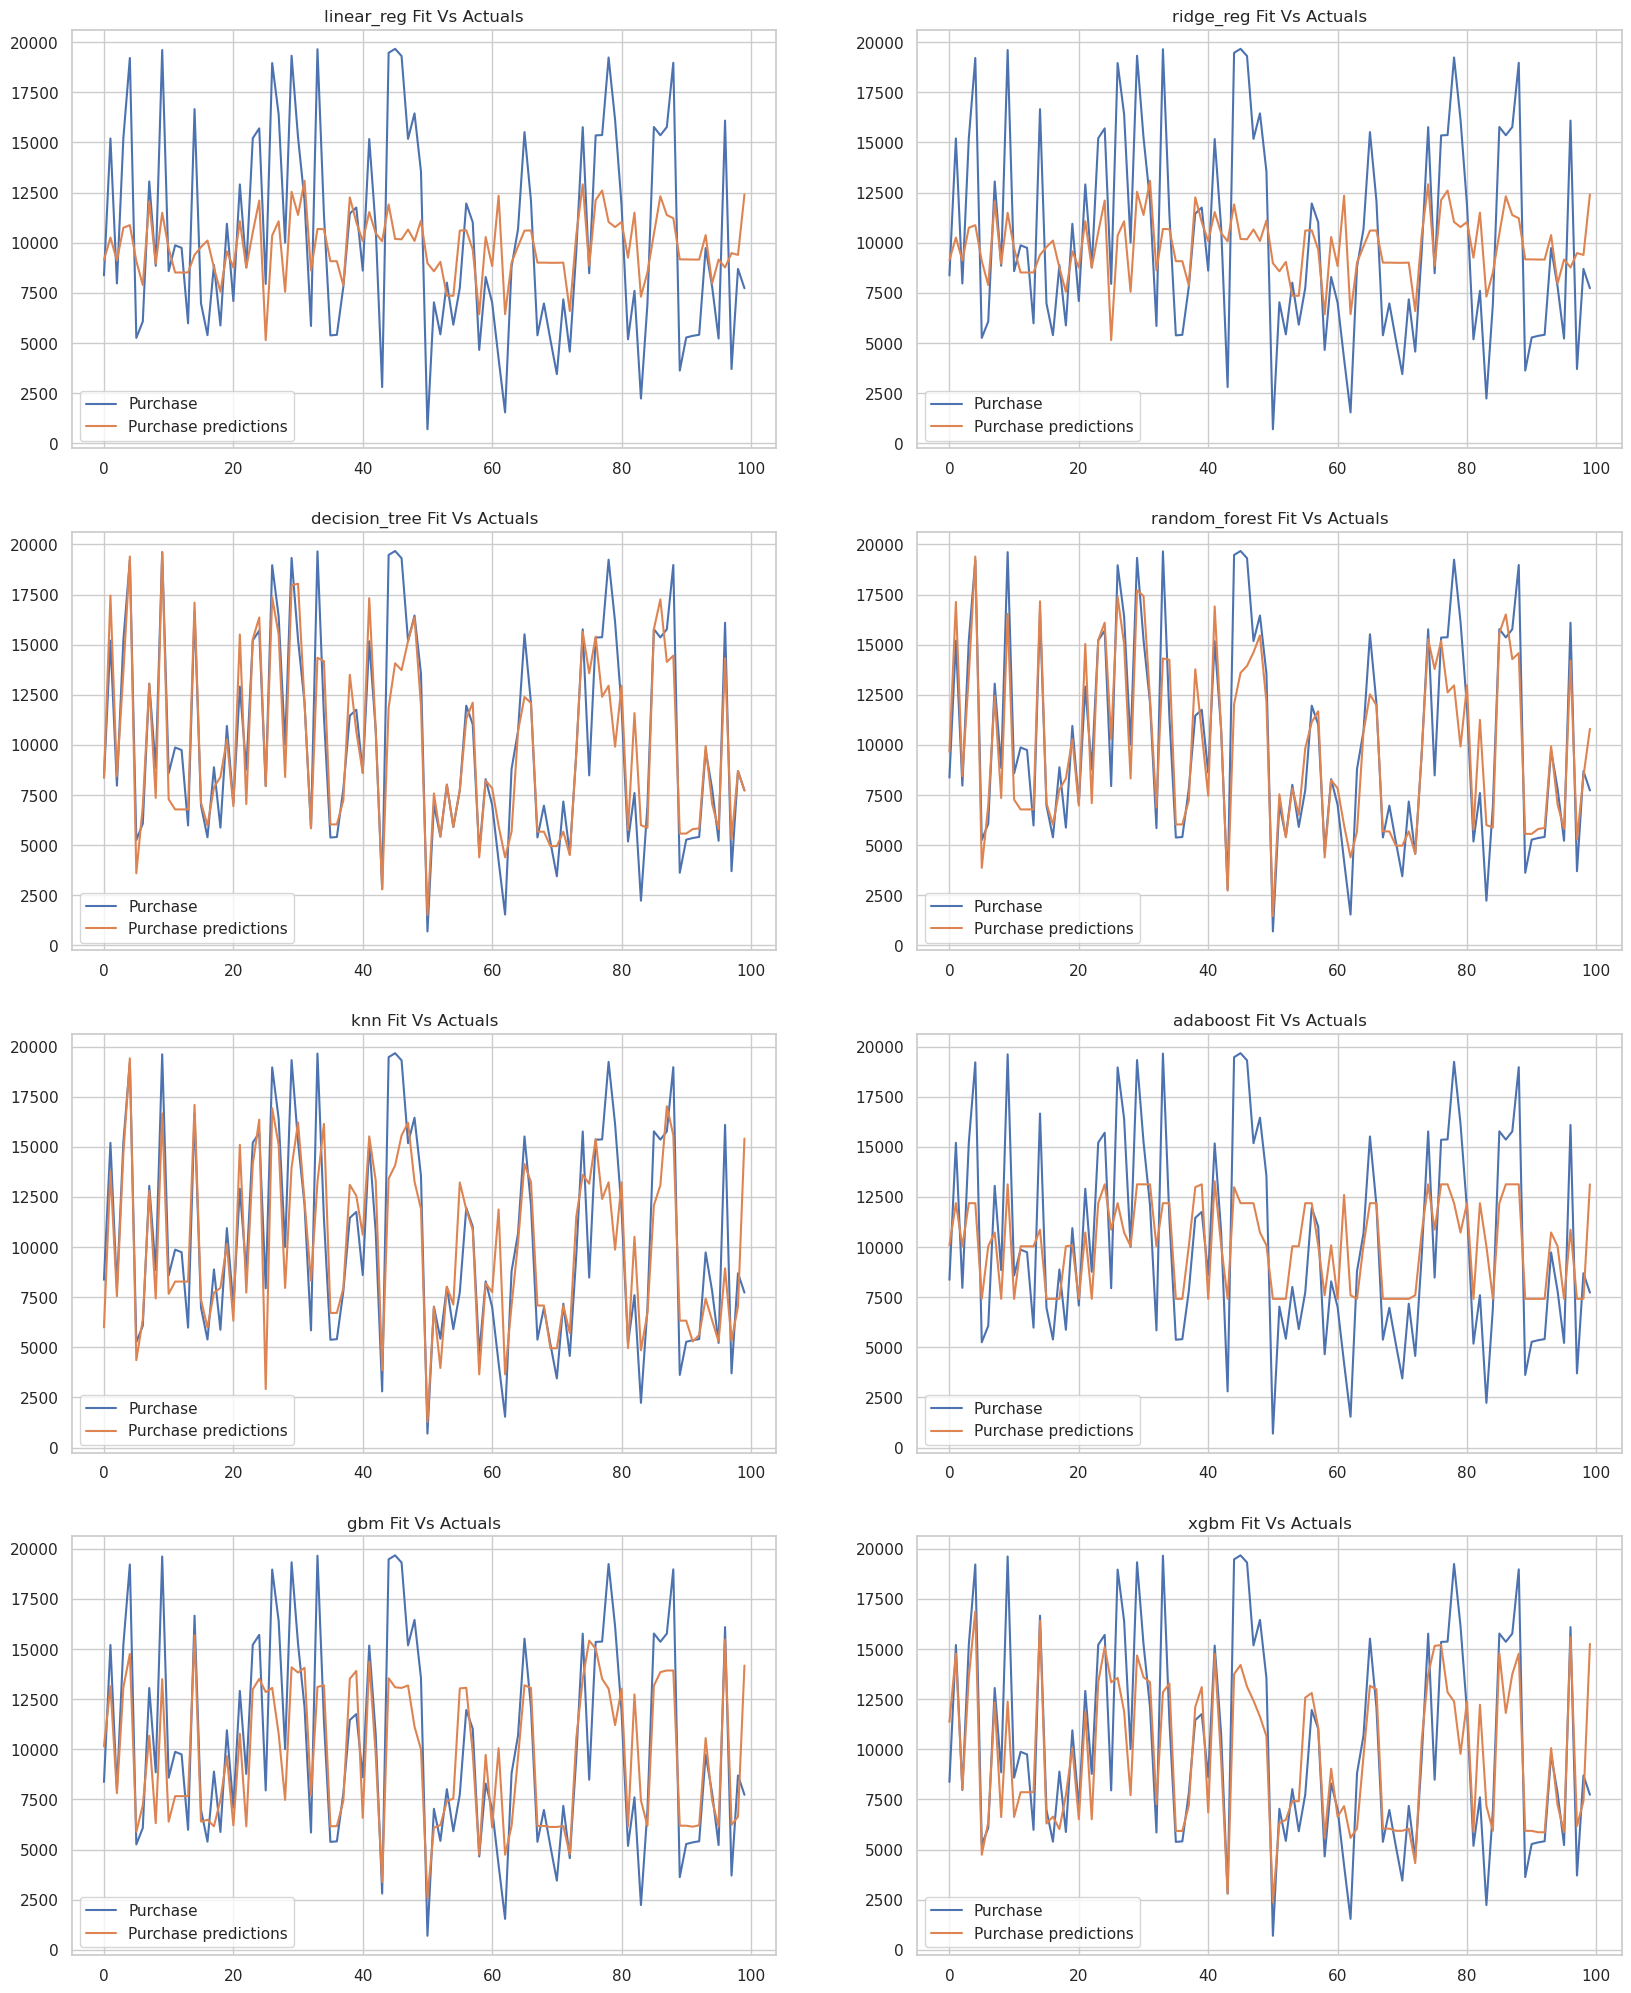

In [44]:
''' Fit Vs Actuals of Scaled models with Target column-Purchase'''
plot_fit_acts(mod_first_cut,actuals = y_train.copy())

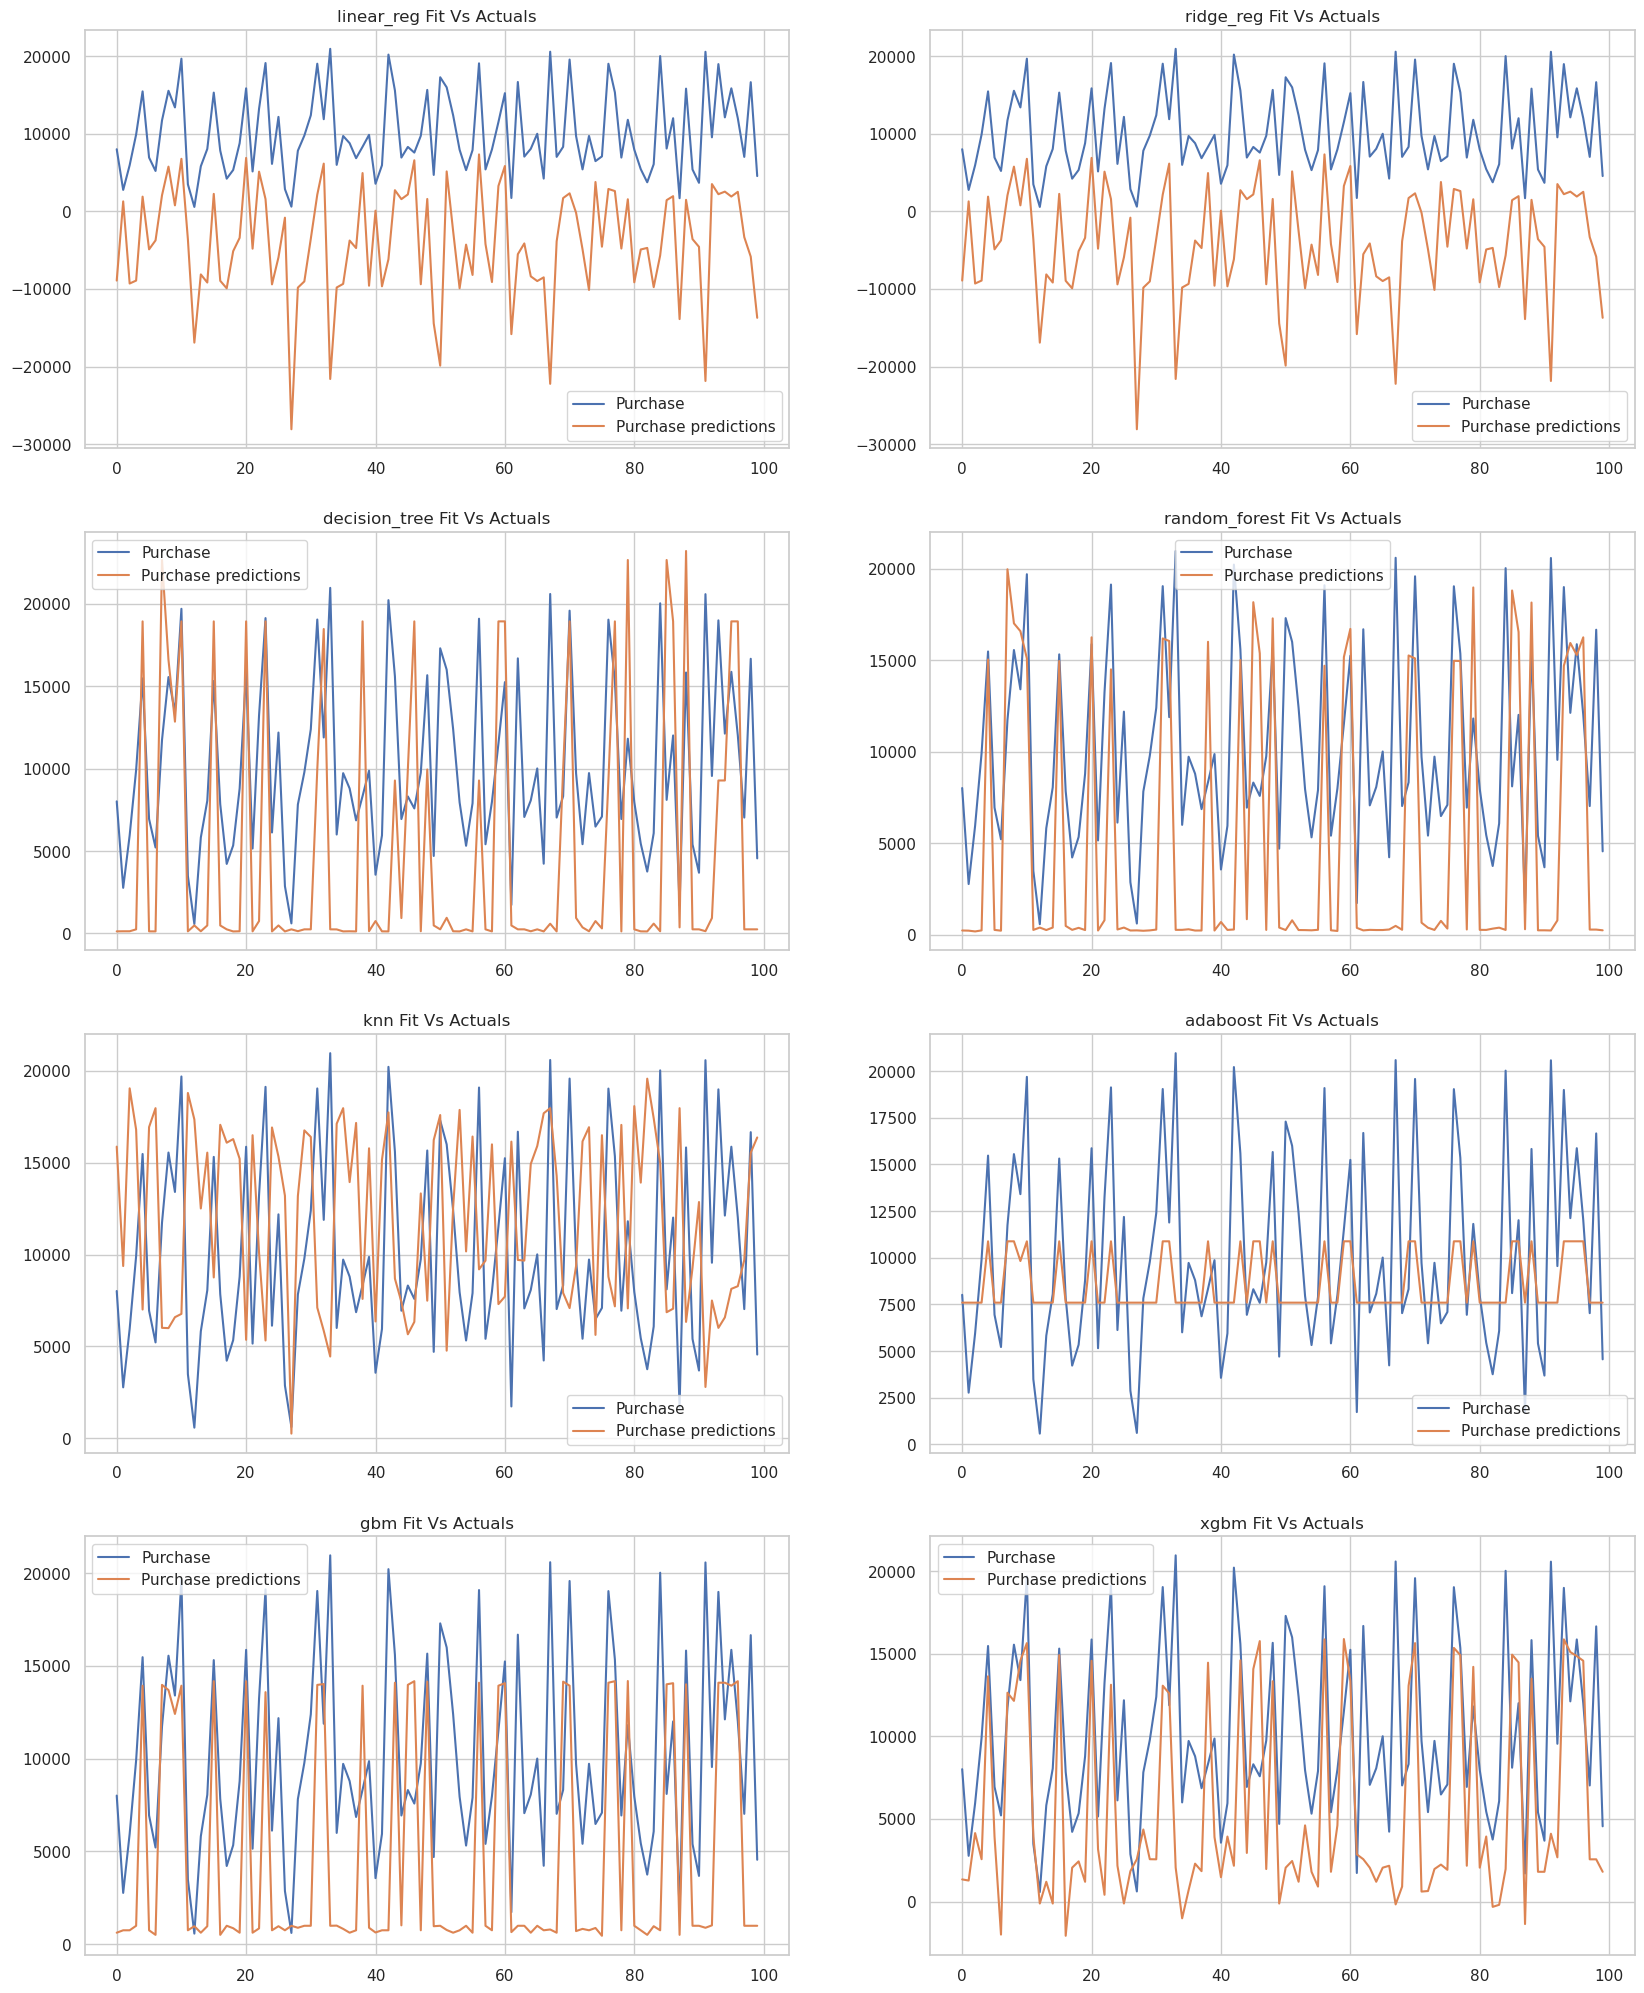

In [45]:
''' Fit Vs Actuals of Validation Data with Target column-Purchase'''

plot_fit_acts(mod_val,actuals = y_val.copy())

In [46]:
'''
Observation:

1. Inferring the Fit Vs Actuals more of hyperparameter tuning is required reduce high variation in output
2. Having more feature extraction might help for better predictions.

'''

'\nObservation:\n\n1. Inferring the Fit Vs Actuals more of hyperparameter tuning is required reduce high variation in output\n2. Having more feature extraction might help for better predictions.\n\n'